In [1]:
# importing libraries
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as cm
from matplotlib.colors import hsv_to_rgb
from cycler import cycler
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import io
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
# Loading the data 
path = './Data/'
filename ='city_code_en.csv'
filename2 = 'flow_20200110_20200430_all.csv'

# loading city code file
df1 = pd.read_csv(path+filename,index_col='city_id')
df1.head()

,city_name,pro_id,pro_name
city_id,,,
110000,Beijing,110000,Beijing
120000,Tianjin,120000,Tianjin
131100,Hengshui,130000,Hebei Province
130100,Shijiazhuang City,130000,Hebei Province
130200,Tangshan,130000,Hebei Province


### Data Cleaning and Exploration

Trying to firgure out the encryption issue with column with 'Kunshan City' in the city_code_en file

In [4]:
df1["pro_name"].unique()

array(['Beijing', 'Tianjin', 'Hebei Province', 'Shanxi Province',
       'Inner Mongolia Autonomous Region', 'Liaoning Province',
       'Jilin Province', 'Heilongjiang Province', 'Shanghai',
       'Jiangsu Province', nan, 'Zhejiang Province', 'Anhui Province',
       'Fujian Province', 'Jiangxi Province', 'Shandong Province',
       'Henan Province', 'Hubei Province', 'Hunan Province',
       'Guangdong Province', 'Guangxi Zhuang Autonomous Region', 'Hainan',
       'Chongqing', 'Sichuan Province', 'Guizhou Province',
       'Yunnan Province', 'Tibet Autonomous Region', 'Shaanxi Province',
       'Gansu province', 'Qinghai Province',
       'Ningxia Hui Autonomous Region',
       'Xinjiang Uygur Autonomous Region', 'Taiwan Province', 'Hong Kong',
       'Macao'], dtype=object)

In [5]:
df1.head(81)

,city_name,pro_id,pro_name
city_id,,,
110000,Beijing,110000,Beijing
120000,Tianjin,120000,Tianjin
131100,Hengshui,130000,Hebei Province
130100,Shijiazhuang City,130000,Hebei Province
130200,Tangshan,130000,Hebei Province
...,...,...,...
320400,Changzhou City,320000,Jiangsu Province
320500,Suzhou City,320000,Jiangsu Province
320583 Kunshan City,320000,Jiangsu Province,NaN


In [6]:
df1.drop('320583 Kunshan City',inplace=True)

In [7]:
df1.head(81)

,city_name,pro_id,pro_name
city_id,,,
110000,Beijing,110000,Beijing
120000,Tianjin,120000,Tianjin
131100,Hengshui,130000,Hebei Province
130100,Shijiazhuang City,130000,Hebei Province
130200,Tangshan,130000,Hebei Province
...,...,...,...
320400,Changzhou City,320000,Jiangsu Province
320500,Suzhou City,320000,Jiangsu Province
320600,Nantong city,320000,Jiangsu Province


In [8]:
df1.reset_index(drop=False,inplace=True)

In [9]:
new_entry = ['320583', 'Kunshan City', '320000','Jiangsu Province']  
df1.append(pd.Series(new_entry, index=df1.columns[:len(new_entry)]), ignore_index=True)

,city_id,city_name,pro_id,pro_name
0,110000,Beijing,110000,Beijing
1,120000,Tianjin,120000,Tianjin
2,131100,Hengshui,130000,Hebei Province
3,130100,Shijiazhuang City,130000,Hebei Province
4,130200,Tangshan,130000,Hebei Province
...,...,...,...,...
385,719009,Nantou County,710000,Taiwan Province
386,719010,Chiayi County,710000,Taiwan Province
387,810000,Hong Kong,810000,Hong Kong
388,820000,Macao,820000,Macao


In [10]:
df1.head()

,city_id,city_name,pro_id,pro_name
0,110000,Beijing,110000,Beijing
1,120000,Tianjin,120000,Tianjin
2,131100,Hengshui,130000,Hebei Province
3,130100,Shijiazhuang City,130000,Hebei Province
4,130200,Tangshan,130000,Hebei Province


In [11]:
name_list=df1['city_name'].tolist()

In [12]:
d =  Counter(name_list)  # -> Counter
res = [k for k, v in d.items() if v > 1]
print(res)

['Yichun', 'Suzhou City', 'Taizhou', 'Shengzhou', 'Fuzhou', 'Yulin']


In [13]:
df1.shape

(389, 4)

In [14]:
df1['city_id'].nunique()

389


## Data cleaning and Aggregation

In [15]:
# Reading in the mobility data
df2=pd.read_csv(path+filename2)
crs={'init':'EPSG:4326'}
df2.head()

,到达城市,出发城市,出发省份,到达省份,city_id_o,X_o,Y_o,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,七台河市,万宁市,海南省,黑龙江省,469006.0,110.395985,18.795179,230900.0,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,七台河市,三亚市,海南省,黑龙江省,460200.0,109.508000,18.256600,230900.0,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,七台河市,三明市,福建省,黑龙江省,350400.0,117.629800,26.265600,230900.0,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,七台河市,三沙市,海南省,黑龙江省,460300.0,112.334000,16.832200,230900.0,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,七台河市,三门峡市,河南省,黑龙江省,411200.0,111.196200,34.774600,230900.0,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df2["city_id_o"]=df2["city_id_o"].astype(int)

In [17]:
df2["city_id_d"]=df2["city_id_d"].astype(int)

In [18]:
df2["city_id_o"]=df2["city_id_o"].astype(str)

In [19]:
df2["city_id_d"]=df2["city_id_d"].astype(str)

In [20]:
df2.head()

,到达城市,出发城市,出发省份,到达省份,city_id_o,X_o,Y_o,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,七台河市,万宁市,海南省,黑龙江省,469006,110.395985,18.795179,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,七台河市,三亚市,海南省,黑龙江省,460200,109.508000,18.256600,230900,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,七台河市,三明市,福建省,黑龙江省,350400,117.629800,26.265600,230900,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,七台河市,三沙市,海南省,黑龙江省,460300,112.334000,16.832200,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,七台河市,三门峡市,河南省,黑龙江省,411200,111.196200,34.774600,230900,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df2.shape

(133590, 122)

In [22]:
df2['city_id_o'].nunique()

366

In [23]:
df2['city_id_d'].nunique()

366

In [24]:
# Dropping the columns in foreign language
df2.drop(df2.iloc[:, 0:4], axis=1, inplace=True)
df2.head()

,city_id_o,X_o,Y_o,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,469006,110.395985,18.795179,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,460200,109.508000,18.256600,230900,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,350400,117.629800,26.265600,230900,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,460300,112.334000,16.832200,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,411200,111.196200,34.774600,230900,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
# Mapping columns with city_id_o and city_id_d with origin city and destination city in the main flows dataframe
df2["origin_city"] = df2["city_id_o"].map(df1.set_index("city_id")["city_name"])
df2["dest_city"] = df2["city_id_d"].map(df1.set_index("city_id")["city_name"])
df2["origin_province"] = df2["city_id_o"].map(df1.set_index("city_id")["pro_name"])
df2["dest_province"] = df2["city_id_d"].map(df1.set_index("city_id")["pro_name"])

In [26]:
df2['city_id_o'].nunique()

366

In [27]:
df2['city_id_d'].nunique()

366

In [28]:
# this is because there are many same name cities in same or different provinces
df2['origin_city'].nunique()

356

In [29]:
df2['origin_province'].nunique()

31

In [30]:
df2.head()

,city_id_o,X_o,Y_o,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430,origin_city,dest_city,origin_province,dest_province
0,469006,110.395985,18.795179,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,Wanning,Qitaihe,Hainan,Heilongjiang Province
1,460200,109.508000,18.256600,230900,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0,Sanya,Qitaihe,Hainan,Heilongjiang Province
2,350400,117.629800,26.265600,230900,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,Sanming,Qitaihe,Fujian Province,Heilongjiang Province
3,460300,112.334000,16.832200,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sansha,Qitaihe,Hainan,Heilongjiang Province
4,411200,111.196200,34.774600,230900,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sanmenxia,Qitaihe,Henan Province,Heilongjiang Province


In [31]:
df2["origin_city"] = df2["origin_city"].str.replace("City","")
df2["origin_province"] = df2["origin_province"].str.replace("Province","")
df2["dest_city"] = df2["dest_city"].str.replace("City","")
df2["dest_province"] = df2["dest_province"].str.replace("Province","")

In [32]:
df2['origin_city'].nunique()

356

In [33]:
df2['city_id_o'].nunique()

366

In [34]:
# Reordering the dataframe for better layout 
cols_to_order=['origin_city','origin_province','city_id_o','X_o','Y_o','dest_city','dest_province','city_id_d','X_d','Y_d']
new_columns = cols_to_order + (df2.columns.drop(cols_to_order).tolist())
df2=df2[new_columns]
df2.head()

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,Sanya,Hainan,460200,109.508000,18.256600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,Sanming,Fujian,350400,117.629800,26.265600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,Sansha,Hainan,460300,112.334000,16.832200,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,Henan,411200,111.196200,34.774600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
df2.shape

(133590, 122)

In [36]:
# Aggregating weekly data for the whole data file
a= df2.set_index(['origin_city','origin_province','city_id_o','X_o','Y_o','dest_city','dest_province','city_id_d','X_d','Y_d']).rename(columns=lambda x: pd.to_datetime(x))
a = a.resample('W', axis=1).sum().reset_index()
a.head(20)

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,2020-01-12 00:00:00,2020-01-19 00:00:00,2020-01-26 00:00:00,2020-02-02 00:00:00,2020-02-09 00:00:00,2020-02-16 00:00:00,2020-02-23 00:00:00,2020-03-01 00:00:00,2020-03-08 00:00:00,2020-03-15 00:00:00,2020-03-22 00:00:00,2020-03-29 00:00:00,2020-04-05 00:00:00,2020-04-12 00:00:00,2020-04-19 00:00:00,2020-04-26 00:00:00,2020-05-03 00:00:00
0,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Sanya,Hainan,460200,109.508000,18.256600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,11,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Sanming,Fujian,350400,117.629800,26.265600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Sansha,Hainan,460300,112.334000,16.832200,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,Henan,411200,111.196200,34.774600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,Shanghai,Shanghai,310000,121.468600,31.232000,Qitaihe,Heilongjiang,230900,130.9292,45.7842,47,170,232,66,11,6,7,10,11,11,18,17,32,20,29,23,17
6,Shangrao,Jiangxi,361100,117.962000,28.447800,Qitaihe,Heilongjiang,230900,130.9292,45.7842,2,3,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0
7,Dongfang,Hainan,469007,108.663741,19.089627,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,1,4,4,9,4,1,4,2,6,1,3,7,2,11,14,0
8,Dongguan city,Guangdong,441900,113.746800,23.021800,Qitaihe,Heilongjiang,230900,130.9292,45.7842,4,24,16,5,2,0,0,0,2,5,1,5,2,4,10,6,1
9,Dongying,Shandong,370500,118.654000,37.422400,Qitaihe,Heilongjiang,230900,130.9292,45.7842,31,37,7,5,2,0,0,1,2,3,1,0,1,3,1,1,1


In [37]:
old_names = a.columns.tolist()
old_names

['origin_city',
 'origin_province',
 'city_id_o',
 'X_o',
 'Y_o',
 'dest_city',
 'dest_province',
 'city_id_d',
 'X_d',
 'Y_d',
 Timestamp('2020-01-12 00:00:00', freq='W-SUN'),
 Timestamp('2020-01-19 00:00:00', freq='W-SUN'),
 Timestamp('2020-01-26 00:00:00', freq='W-SUN'),
 Timestamp('2020-02-02 00:00:00', freq='W-SUN'),
 Timestamp('2020-02-09 00:00:00', freq='W-SUN'),
 Timestamp('2020-02-16 00:00:00', freq='W-SUN'),
 Timestamp('2020-02-23 00:00:00', freq='W-SUN'),
 Timestamp('2020-03-01 00:00:00', freq='W-SUN'),
 Timestamp('2020-03-08 00:00:00', freq='W-SUN'),
 Timestamp('2020-03-15 00:00:00', freq='W-SUN'),
 Timestamp('2020-03-22 00:00:00', freq='W-SUN'),
 Timestamp('2020-03-29 00:00:00', freq='W-SUN'),
 Timestamp('2020-04-05 00:00:00', freq='W-SUN'),
 Timestamp('2020-04-12 00:00:00', freq='W-SUN'),
 Timestamp('2020-04-19 00:00:00', freq='W-SUN'),
 Timestamp('2020-04-26 00:00:00', freq='W-SUN'),
 Timestamp('2020-05-03 00:00:00', freq='W-SUN')]

In [38]:
new_names = ['origin_city','origin_province','city_id_o','X_o','Y_o','dest_city','dest_province','city_id_d','X_d','Y_d','Week1','Week2','Week3','Week4','Week5','Week6','Week7','Week8','Week9','Week10','Week11','Week12','Week13','Week14','Week15','Week16','Week17'] 

In [39]:
a = a.rename(columns=dict(zip(old_names, new_names))) 
a.head()

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
0,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Sanya,Hainan,460200,109.508000,18.256600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,11,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Sanming,Fujian,350400,117.629800,26.265600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Sansha,Hainan,460300,112.334000,16.832200,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,Henan,411200,111.196200,34.774600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [40]:
#saving the weekly aggregated file
#a.to_csv('./Data/weekly_aggregation_final.csv',index=False)

In [41]:
a.shape

(133590, 27)

In [42]:
a.describe()

,X_o,Y_o,X_d,Y_d,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
count,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000
mean,110.879881,32.676788,110.879881,32.676788,313.253470,749.462961,755.931582,296.219440,150.147631,123.143244,191.102395,292.257579,316.004484,345.282469,382.664129,405.844157,496.889049,452.915188,423.539614,404.968553,247.170694
std,10.323724,7.375042,10.323724,7.375042,2856.563525,5926.825595,6171.605195,2351.942713,1337.033554,1153.209859,1663.913186,2533.343186,2982.608122,3427.358708,3791.178338,4032.744581,4853.443380,4379.578678,4347.369672,4224.588353,2438.349814
min,75.992600,16.832200,75.992600,16.832200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106.226800,27.368800,106.226800,27.368800,1.000000,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,112.669439,32.170500,112.669439,32.170500,9.000000,24.000000,20.000000,8.000000,3.000000,2.000000,4.000000,6.000000,7.000000,7.000000,10.000000,10.000000,10.000000,11.000000,10.000000,9.000000,6.000000
75%,117.478800,37.869600,117.478800,37.869600,49.000000,128.000000,114.000000,47.000000,17.000000,14.000000,24.000000,39.000000,43.000000,45.000000,53.000000,55.000000,57.000000,59.000000,54.000000,51.000000,34.000000
max,131.151400,52.451053,131.151400,52.451053,238145.000000,438085.000000,434504.000000,129689.000000,74333.000000,99046.000000,134575.000000,200937.000000,257190.000000,310956.000000,340345.000000,365848.000000,410584.000000,366147.000000,406575.000000,388885.000000,211469.000000


### Descriptive Statistics

In [248]:
#Total sum per column: 
totl=a.copy()
tot=totl.drop(['origin_city','origin_province','city_id_o','X_o','Y_o','dest_city','dest_province','city_id_d','X_d','Y_d'],axis=1)
tot.loc['Total',:]= totl.sum(axis=0)

#Total sum per row: 
tot.loc[:,'Total'] = totl.sum(axis=1)
# Total devices
tot.tail(1)
#tot.to_csv('./Data/summarytables/total_sum_by_column.csv',index=False)

In [79]:
# Total sum by Origin City 
orig_city_sum=a.groupby(['origin_city'])[["Week1", "Week2", "Week3","Week4","Week5","Week6","Week7","Week8","Week9","Week10","Week11", "Week12", "Week13","Week14","Week15","Week16","Week17"]].sum().reset_index()
#orig_city_sum.to_csv('./Data/summarytables/2020/total_sum_by_origin_city_2020.csv',index=False)
orig_city_sum.tail(5)

,origin_city,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
351,Zhuzhou,111171,237590,285072,142652,98767,81248,105425,150670,139621,149903,157499,157363,208762,195944,170230,160266,93236
352,Zibo,137609,243104,255696,90404,50764,53784,63737,88864,114694,143535,174082,191952,238800,212252,216368,211865,125587
353,Zigong,57326,127544,168668,164562,91932,54268,78991,132277,116826,114656,108849,104478,112193,117089,94282,88149,50566
354,Ziyang,58752,142415,210750,237911,101512,46174,90921,148086,136605,127626,120796,114966,131324,127893,99788,90745,52189
355,Zunyi,135638,330323,357513,229060,68981,81853,219229,305465,308003,278780,258624,253000,269839,258872,238644,228083,138850


In [80]:
# Total sum by Destination City 
dest_city_sum=a.groupby(['dest_city'])[["Week1", "Week2", "Week3","Week4","Week5","Week6","Week7","Week8","Week9","Week10","Week11", "Week12", "Week13","Week14","Week15","Week16","Week17"]].sum().reset_index()
#dest_city_sum.to_csv('./Data/summarytables/2020/total_sum_by_destination_city_2020.csv',index=False)
dest_city_sum.tail(5)

,dest_city,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
351,Zhuzhou,139903,393572,364518,131943,70061,57910,75153,121060,122689,141990,170790,172017,222667,193724,181820,170183,110654
352,Zibo,125777,228872,242518,96672,47744,53267,64573,91724,120835,150967,178551,194187,234323,209950,210411,203204,120446
353,Zigong,77578,236424,338881,97927,57082,39141,47189,73773,74327,80453,84256,93365,127606,91062,92792,86219,53363
354,Ziyang,84902,278089,493776,120349,61380,29108,40421,74238,81875,93536,103338,117478,177139,101655,103864,95701,62176
355,Zunyi,214294,529122,521744,187021,62765,58214,160481,209118,198812,208743,213378,224556,271385,233933,232556,227253,144852


In [81]:
# Total sum by Origin Province 
orig_prov_sum=a.groupby(['origin_province'])[["Week1", "Week2", "Week3","Week4","Week5","Week6","Week7","Week8","Week9","Week10","Week11", "Week12", "Week13","Week14","Week15","Week16","Week17"]].sum().reset_index()
#orig_prov_sum.to_csv('./Data/summarytables/2020/total_sum_by_origin_province_2020.csv',index=False)
orig_prov_sum.tail(5)

,origin_province,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
26,Tianjin,504389,1077577,1100843,192706,111957,102432,128028,170305,209759,254329,300384,362271,472872,414966,452245,462016,311273
27,Tibet Autonomous Region,82414,178021,161793,92954,25718,29391,37610,43529,49582,52581,62208,85938,114019,115372,129063,126087,77860
28,Xinjiang Uygur Autonomous Region,680556,1462041,1445336,435114,136761,106603,105087,130298,197012,677779,894014,986120,1032885,983990,1049082,1060617,611373
29,Yunnan,1155211,2748614,2906887,1421573,618240,644848,915099,1682523,1744883,1781753,1745244,1721514,1939310,1677976,1621992,1544476,887177
30,Zhejiang,2953756,8157582,5363299,1086988,358621,334304,863844,1375095,1769828,2130176,2507232,2714249,3555802,3061323,3040294,2944820,1841738


In [82]:
# Total sum by Destination Province 
dest_prov_sum=a.groupby(['dest_province'])[["Week1", "Week2", "Week3","Week4","Week5","Week6","Week7","Week8","Week9","Week10","Week11", "Week12", "Week13","Week14","Week15","Week16","Week17"]].sum().reset_index()
#dest_prov_sum.to_csv('./Data/summarytables/2020/total_sum_by_destination_province_2020.csv',index=False)
dest_prov_sum.tail(5)

,dest_province,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
26,Tianjin,378305,658106,502166,426373,199654,157087,213570,294257,322106,354016,407147,446144,488546,509696,490049,491372,299852
27,Tibet Autonomous Region,64893,136744,133474,89003,30270,35270,45674,57036,67918,72038,80135,101437,130944,131102,137958,131668,76822
28,Xinjiang Uygur Autonomous Region,621107,1278500,1268959,475020,146491,101344,98062,122633,196845,724599,1078077,1117175,1118157,1052068,1102546,1086215,616046
29,Yunnan,1260646,2969961,2991465,1389136,619302,652457,871406,1590648,1642831,1688190,1688288,1692377,1879014,1702814,1624380,1547726,875114
30,Zhejiang,1914064,3643409,3050185,1409505,419611,568129,2094711,3197217,3357692,3149244,3219993,3192343,3545452,3374725,3112934,2962634,1742259


In [252]:
# Percentage by origin city
tot_orig_perc=a.groupby(['origin_city','origin_province']).sum().reset_index()
tot_orig_perc.drop(['X_o','Y_o','X_d','Y_d'],axis=1,inplace=True)
total = np.sum(tot_orig_perc.loc[:,'Week1':].values)
tot_orig_perc['Percent'] = tot_orig_perc.loc[:,'Week1':].sum(axis=1)/total * 100
#tot_orig_perc.to_csv('./Data/summarytables/total_origin_perc.csv',index=False)
tot_orig_perc

,origin_city,origin_province,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17,Percent
0,of Yantai,Shandong,164544,293605,312425,138954,59671,48654,60069,75750,89058,112264,137459,152315,194506,183007,168688,168351,107125,0.290899
1,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,36203,79901,63525,26112,11896,6322,8487,16505,15433,16948,21330,29469,43933,45064,46055,44384,34454,0.064399
2,Aksu region,Xinjiang Uygur Autonomous Region,37300,88930,63278,17325,5873,4958,5529,7797,12366,30401,44945,50477,51659,49160,55331,55068,32554,0.072293
3,Ali area,Tibet Autonomous Region,1166,2043,1724,531,344,392,459,491,549,574,815,1248,1929,1599,2024,2284,1467,0.002316
4,Altay region,Xinjiang Uygur Autonomous Region,14176,30688,26848,10056,2634,2310,2045,2963,4992,17858,20892,21063,23778,23663,25513,26120,15743,0.032003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,Zhuzhou,Hunan,111171,237590,285072,142652,98767,81248,105425,150670,139621,149903,157499,157363,208762,195944,170230,160266,93236,0.312008
361,Zibo,Shandong,137609,243104,255696,90404,50764,53784,63737,88864,114694,143535,174082,191952,238800,212252,216368,211865,125587,0.308196
362,Zigong,Sichuan,57326,127544,168668,164562,91932,54268,78991,132277,116826,114656,108849,104478,112193,117089,94282,88149,50566,0.210251
363,Ziyang,Sichuan,58752,142415,210750,237911,101512,46174,90921,148086,136605,127626,120796,114966,131324,127893,99788,90745,52189,0.240421


In [255]:
# Percentage by destination city
tot_dest_perc=a.groupby(['dest_city','dest_province']).sum().reset_index()
tot_dest_perc.drop(['X_o','Y_o','X_d','Y_d'],axis=1,inplace=True)
total = np.sum(tot_dest_perc.loc[:,'Week1':].values)
tot_dest_perc['Percent'] = tot_dest_perc.loc[:,'Week1':].sum(axis=1)/total * 100
#tot_dest_perc.to_csv('./Data/summarytables/total_dest_perc.csv',index=False)
tot_dest_perc

,dest_city,dest_province,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17,Percent
0,of Yantai,Shandong,117978,227154,301174,122969,53377,43913,64069,85027,106423,136539,160934,161255,216108,174535,173082,165479,104050,0.284722
1,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,42013,79257,83386,24195,14902,7388,5876,16447,16513,19230,23887,33610,49931,50267,51072,51136,30287,0.070695
2,Aksu region,Xinjiang Uygur Autonomous Region,40938,74367,59574,19003,7039,5042,5013,8192,13672,40254,65262,65270,58022,54021,58450,57704,34349,0.078570
3,Ali area,Tibet Autonomous Region,427,879,845,826,500,480,595,749,808,703,899,1349,1652,2258,2636,2626,1389,0.002314
4,Altay region,Xinjiang Uygur Autonomous Region,11426,26316,28281,7796,2673,2433,2037,2353,8025,14971,19906,22474,25225,24474,26075,25874,14545,0.031241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,Zhuzhou,Hunan,139903,393572,364518,131943,70061,57910,75153,121060,122689,141990,170790,172017,222667,193724,181820,170183,110654,0.335035
361,Zibo,Shandong,125777,228872,242518,96672,47744,53267,64573,91724,120835,150967,178551,194187,234323,209950,210411,203204,120446,0.303587
362,Zigong,Sichuan,77578,236424,338881,97927,57082,39141,47189,73773,74327,80453,84256,93365,127606,91062,92792,86219,53363,0.206570
363,Ziyang,Sichuan,84902,278089,493776,120349,61380,29108,40421,74238,81875,93536,103338,117478,177139,101655,103864,95701,62176,0.249924


In [258]:
# Percentage by origin province
tot_orig_percprov=a.groupby(['origin_province']).sum().reset_index()
tot_orig_percprov.drop(['X_o','Y_o','X_d','Y_d'],axis=1,inplace=True)
total = np.sum(tot_orig_percprov.loc[:,'Week1':].values)
tot_orig_percprov['Percent'] = tot_orig_percprov.loc[:,'Week1':].sum(axis=1)/total * 100
#tot_orig_percprov.to_csv('./Data/summarytables/total_orig_provperc.csv',index=False)
tot_orig_percprov

,origin_province,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17,Percent
0,Anhui,1456637,3333612,4006289,2494359,1192636,860228,1617712,2506260,2522820,2530804,2696338,2651896,3203949,3038523,2637823,2526186,1473057,4.806067
1,Beijing,1214735,2961398,3800371,417079,216294,191186,210540,259995,281412,312878,362939,420203,496803,443559,476841,573435,420021,1.540296
2,Chongqing,396255,1101762,1516834,669751,280873,188865,316507,593953,618291,585344,564926,549541,659827,564088,532516,503007,323363,1.175383
3,Fujian,1185945,3117546,2871000,997542,580153,487016,814812,1058500,1069260,1161268,1262223,1274638,1676870,1554442,1396903,1319806,808607,2.669816
4,Gansu province,546512,1220813,1158680,573122,289126,244681,398135,680339,721785,797198,893359,913319,986860,945567,932731,881585,520540,1.498387
5,Guangdong,6169318,18233641,14777839,3824271,2569001,2259970,3211023,4773186,5243422,5918345,6338526,6878424,9573316,7601884,7220633,6910935,4389368,13.668758
6,Guangxi Zhuang Autonomous Region,1217937,2678343,2878086,1768108,819320,711891,1198327,2139861,1785281,1777834,1618649,1758335,2206493,2544561,1778456,1660092,1004064,3.484696
7,Guizhou,1071821,2444564,2587096,1439499,494725,491172,1371185,1956101,2073997,1993718,1882224,1804529,2053933,1859284,1751398,1660357,1026087,3.297880
8,Hainan,558969,1290076,1453968,699936,390893,269398,309091,500729,598497,670602,729486,794487,1061228,842306,802224,721237,417464,1.428357
9,Hebei,1950904,3813967,3144396,1598594,894173,756041,994167,1273299,1565931,1842494,2109453,2330637,2718681,2645751,2659079,2719260,1645132,4.088129


In [259]:
# Percentage by destination province
tot_dest_percprov=a.groupby(['dest_province']).sum().reset_index()
tot_dest_percprov.drop(['X_o','Y_o','X_d','Y_d'],axis=1,inplace=True)
total = np.sum(tot_dest_percprov.loc[:,'Week1':].values)
tot_dest_percprov['Percent'] = tot_dest_percprov.loc[:,'Week1':].sum(axis=1)/total * 100
#tot_dest_percprov.to_csv('./Data/summarytables/total_dest_provperc.csv',index=False)
tot_dest_percprov

,dest_province,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17,Percent
0,Anhui,1926668,5889344,6831671,1667359,757345,594726,855113,1505491,1721953,1989388,2360565,2527882,3316614,2753933,2610955,2535826,1627403,4.891352
1,Beijing,954877,1882203,1113236,1282703,738350,508668,468329,480359,447196,486785,542607,584425,658558,668389,624138,681196,421980,1.479474
2,Chongqing,609660,1711637,1598406,624816,271453,161189,242827,417476,420613,445815,489830,510590,582764,558229,525649,514571,330814,1.181355
3,Fujian,1027907,2472427,2649885,1055940,575642,493340,894617,1229077,1242700,1297731,1334701,1320550,1715387,1550385,1397751,1308179,797244,2.637610
4,Gansu province,627545,1485202,1566450,548003,252538,232174,370534,640447,682581,781605,873426,885979,975362,925280,922966,882426,526277,1.554344
5,Guangdong,4632317,10567812,9417596,5516663,4136455,3370682,5045517,7655509,7377279,7332331,7501025,7565856,9104261,8984750,7456944,6945428,4109308,13.766253
6,Guangxi Zhuang Autonomous Region,1564576,4524954,4321545,1493396,599001,489243,744320,1381892,1369769,1542308,1535944,1746359,2563550,2052690,1713244,1664735,1060926,3.581741
7,Guizhou,1432538,3432855,2957086,1457265,476975,442016,1221945,1587288,1586639,1619648,1628594,1682279,1992883,1819293,1724912,1662511,1025411,3.272929
8,Hainan,561683,1289670,1515790,529868,323525,228720,276438,486906,596024,669695,717622,771188,1023416,845091,787240,700323,405831,1.383355
9,Hebei,1980048,4010567,4370982,1261456,675428,580528,777761,1048107,1375985,1662606,1948159,2196295,2652707,2436221,2501804,2574247,1613068,3.970659


In [260]:
a['origin_city'].nunique()

356

In [42]:
# Aggregating by month
a_m= df2.set_index(['origin_city','origin_province','city_id_o','X_o','Y_o','dest_city','dest_province','city_id_d','X_d','Y_d']).rename(columns=lambda x: pd.to_datetime(x))
a_m = a_m.resample('M', axis=1).sum().reset_index()
a_m.head(20)

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00
0,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,2,6,14,5
1,Sanya,Hainan,460200,109.508000,18.256600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,99,86,111,123
2,Sanming,Fujian,350400,117.629800,26.265600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,4,1,0,5
3,Sansha,Hainan,460300,112.334000,16.832200,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0
4,Sanmenxia,Henan,411200,111.196200,34.774600,Qitaihe,Heilongjiang,230900,130.9292,45.7842,5,0,1,0
5,Shanghai,Shanghai,310000,121.468600,31.232000,Qitaihe,Heilongjiang,230900,130.9292,45.7842,510,38,69,110
6,Shangrao,Jiangxi,361100,117.962000,28.447800,Qitaihe,Heilongjiang,230900,130.9292,45.7842,6,0,2,0
7,Dongfang,Hainan,469007,108.663741,19.089627,Qitaihe,Heilongjiang,230900,130.9292,45.7842,6,21,15,31
8,Dongguan city,Guangdong,441900,113.746800,23.021800,Qitaihe,Heilongjiang,230900,130.9292,45.7842,49,2,13,23
9,Dongying,Shandong,370500,118.654000,37.422400,Qitaihe,Heilongjiang,230900,130.9292,45.7842,79,4,6,7


In [43]:
# Describing the aggregation by week
a.describe()

,X_o,Y_o,X_d,Y_d,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
count,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000,133590.000000
mean,110.879881,32.676788,110.879881,32.676788,313.253470,749.462961,755.931582,296.219440,150.147631,123.143244,191.102395,292.257579,316.004484,345.282469,382.664129,405.844157,496.889049,452.915188,423.539614,404.968553,247.170694
std,10.323724,7.375042,10.323724,7.375042,2856.563525,5926.825595,6171.605195,2351.942713,1337.033554,1153.209859,1663.913186,2533.343186,2982.608122,3427.358708,3791.178338,4032.744581,4853.443380,4379.578678,4347.369672,4224.588353,2438.349814
min,75.992600,16.832200,75.992600,16.832200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106.226800,27.368800,106.226800,27.368800,1.000000,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,112.669439,32.170500,112.669439,32.170500,9.000000,24.000000,20.000000,8.000000,3.000000,2.000000,4.000000,6.000000,7.000000,7.000000,10.000000,10.000000,10.000000,11.000000,10.000000,9.000000,6.000000
75%,117.478800,37.869600,117.478800,37.869600,49.000000,128.000000,114.000000,47.000000,17.000000,14.000000,24.000000,39.000000,43.000000,45.000000,53.000000,55.000000,57.000000,59.000000,54.000000,51.000000,34.000000
max,131.151400,52.451053,131.151400,52.451053,238145.000000,438085.000000,434504.000000,129689.000000,74333.000000,99046.000000,134575.000000,200937.000000,257190.000000,310956.000000,340345.000000,365848.000000,410584.000000,366147.000000,406575.000000,388885.000000,211469.000000


In [46]:
#df2.to_csv('./Data/final_file.csv')

### Data Manipulation for Mapping

Getting flows and locations files for the Flowmap visualizations

In [48]:
# Pivoting the data file 
visual_df=df2.set_index(['origin_city','origin_province','city_id_o','X_o','Y_o','dest_city','dest_province','city_id_d','X_d','Y_d']).stack().reset_index().rename(columns = {'level_10' : 'Date', 0: 'Val'})
visual_df.head()

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,Date,Val
0,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,20200110,0
1,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,20200111,0
2,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,20200112,0
3,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,20200113,0
4,Wanning,Hainan,469006,110.395985,18.795179,Qitaihe,Heilongjiang,230900,130.9292,45.7842,20200114,0


In [49]:
visual_df['Date'].dtypes

dtype('O')

In [50]:
# converting to datetime format
visual_df['Date'] = pd.to_datetime(visual_df['Date'], format= '%Y/%m/%d')

In [52]:
visual_df.dtypes

origin_city                object
origin_province            object
city_id_o                  object
X_o                       float64
Y_o                       float64
dest_city                  object
dest_province              object
city_id_d                  object
X_d                       float64
Y_d                       float64
Date               datetime64[ns]
Val                         int64
dtype: object

In [51]:
#Total number of traveling devices by week
total_by_week=visual_df.groupby(visual_df.Date.dt.strftime('%W')).Val.sum().reset_index()
#total_by_week.to_csv('./Data/summarytables/total_by_week.csv',index=False)
total_by_week

,Date,Val
0,01,41847531
1,02,100120757
2,03,100984900
3,04,39571955
4,05,20058222
5,06,16450706
6,07,25529369
7,08,39042690
8,09,42215039
9,10,46126285


In [56]:
total=total_by_week['Val'].sum()
total

847868563

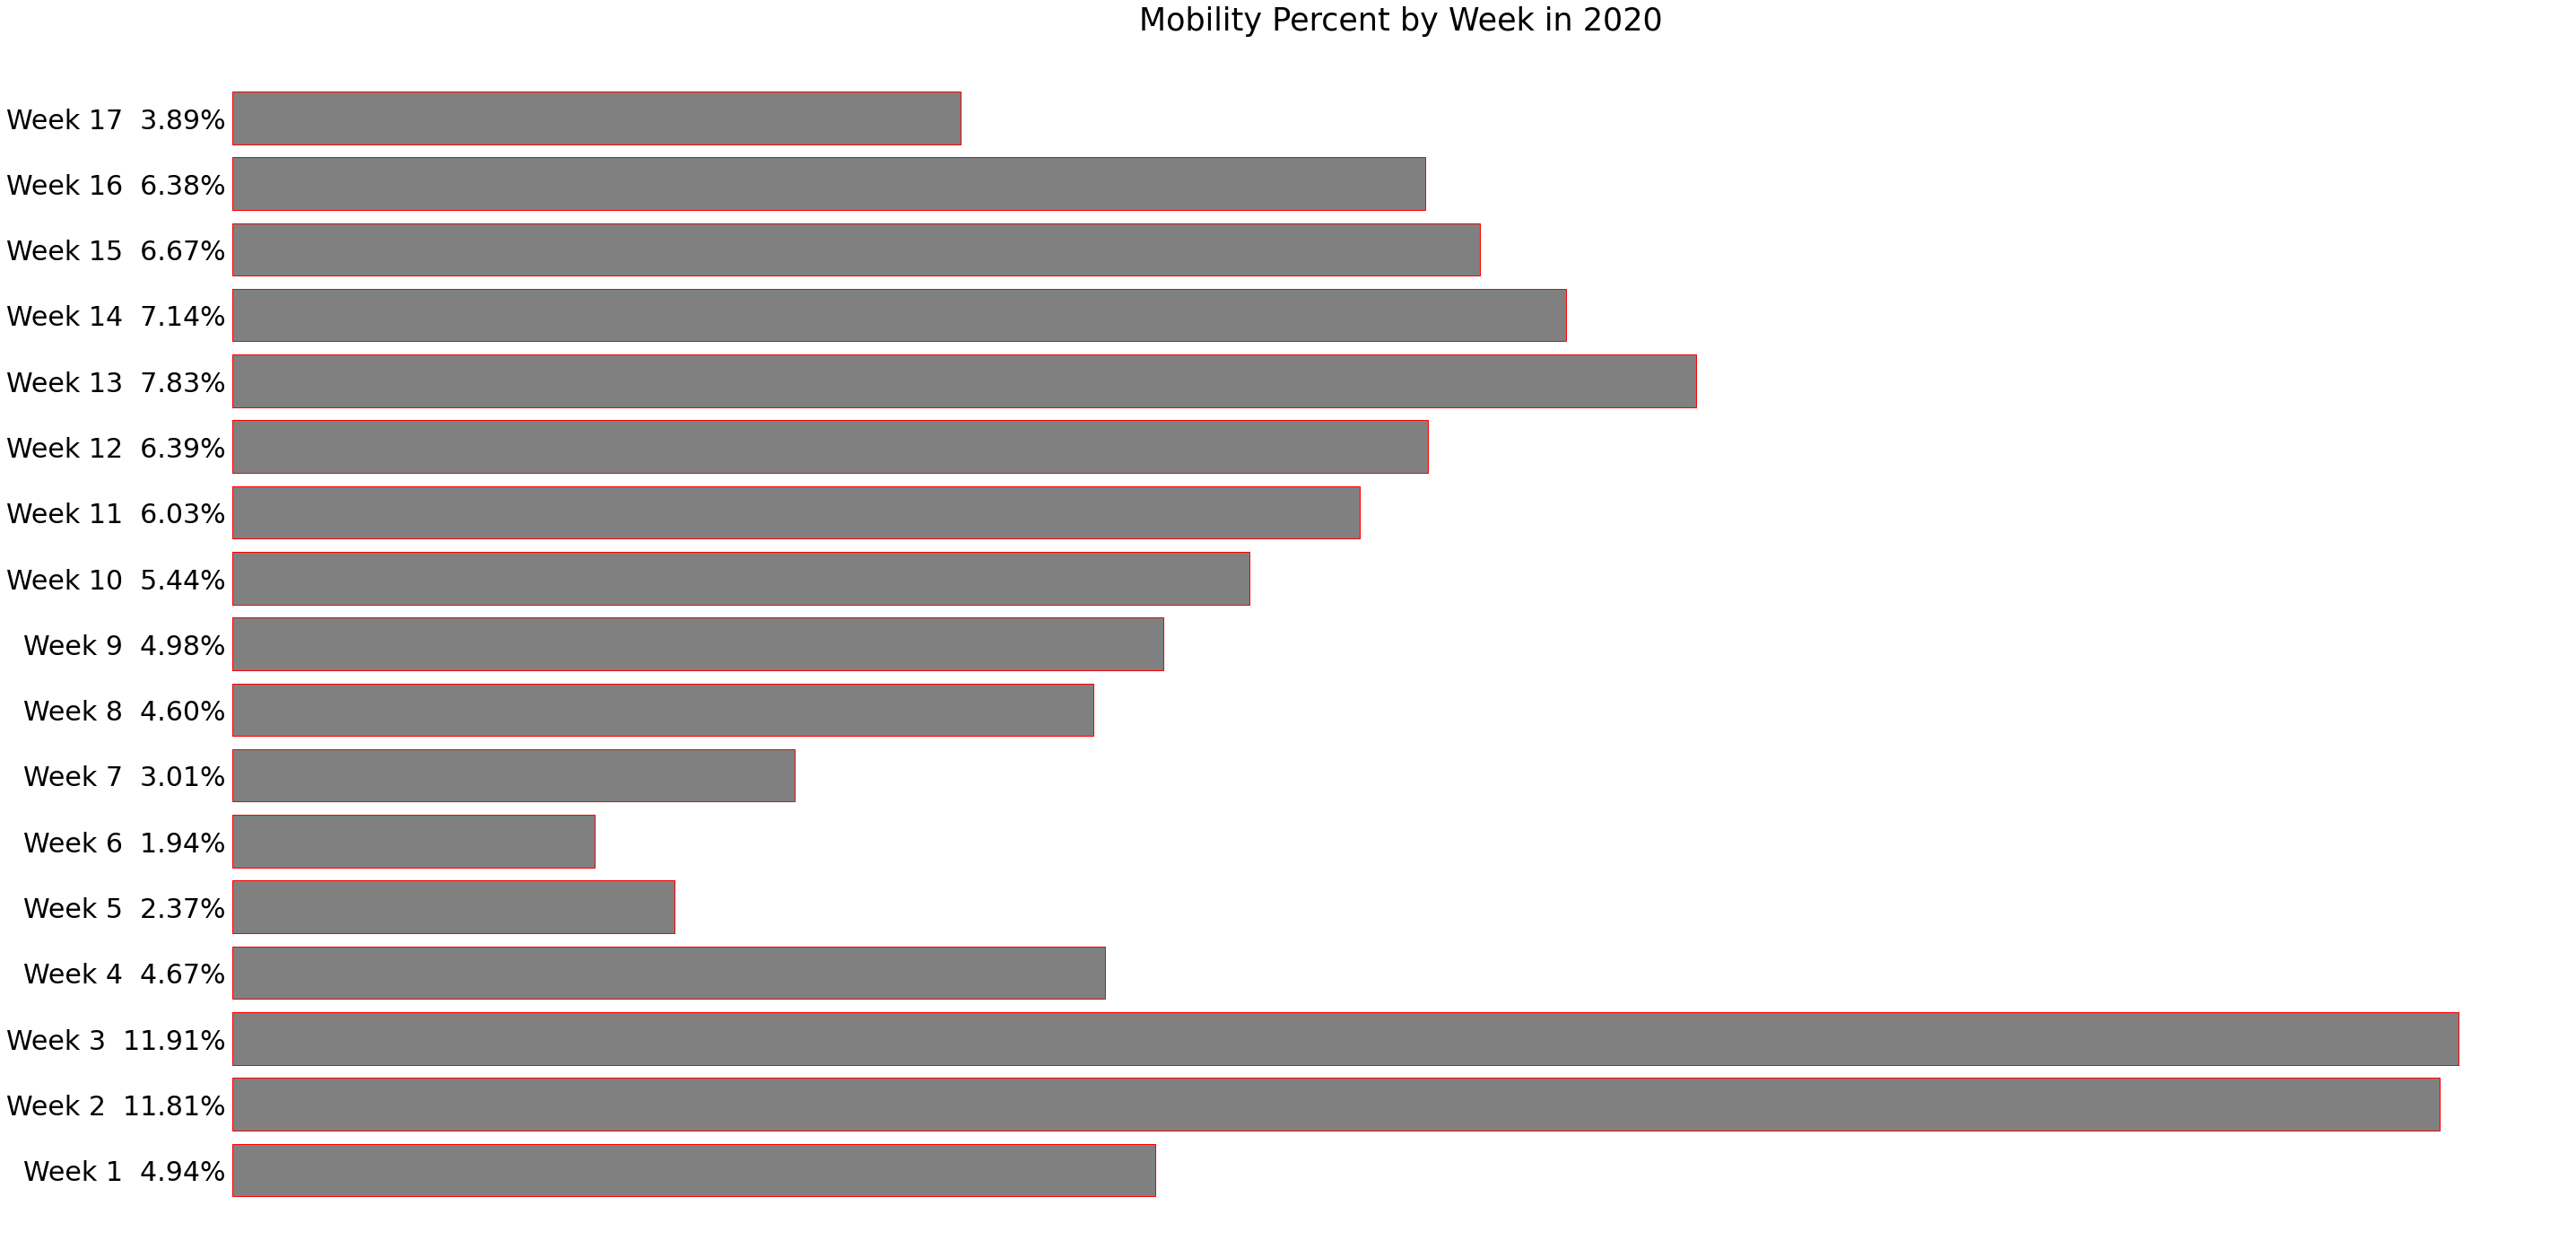

In [75]:
# Bar plot by Percentage
fig, ax = plt.subplots(figsize=(40, 20))

percent = total_by_week['Val']/total*100
weeks=['Week 1','Week 2','Week 3','Week 4','Week 5','Week 6','Week 7','Week 8','Week 9','Week 10','Week 11','Week 12','Week 13','Week 14','Week 15','Week 16','Week 17']
new_labels = [i+'  {:.2f}%'.format(j) for i, j in zip(weeks, percent)]

plt.barh(weeks, total_by_week['Val'], color='gray', edgecolor='red')
plt.yticks(range(len(weeks)), new_labels,fontsize=30)
ax.set_title('Mobility Percent by Week in 2020', fontsize=35)
plt.tight_layout()

for spine in ax.spines.values():
    spine.set_visible(False)

ax.axes.get_xaxis().set_visible(False)
ax.tick_params(axis="y", left=False)
#plt.savefig('./Media/MobilityPerc_by_week_2020.png')
plt.show()

In [277]:
visual_df.shape

(14962080, 12)

In [53]:
# Aggregating the whole data set by weekly and starting with every Monday to reduce and visualize it better
df_final = (visual_df
     .reset_index()
     .set_index("Date")
     .groupby(['origin_city','origin_province','city_id_o','X_o','Y_o','dest_city','dest_province','city_id_d','X_d','Y_d',pd.Grouper(freq='W-MON')])["Val"].sum()
     .astype(int)
     .reset_index())
df_final.head()

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,Date,Val
0,of Yantai,Shandong,370600,121.4256,37.4648,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,102.2204,31.9026,2020-01-13,6
1,of Yantai,Shandong,370600,121.4256,37.4648,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,102.2204,31.9026,2020-01-20,11
2,of Yantai,Shandong,370600,121.4256,37.4648,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,102.2204,31.9026,2020-01-27,13
3,of Yantai,Shandong,370600,121.4256,37.4648,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,102.2204,31.9026,2020-02-03,3
4,of Yantai,Shandong,370600,121.4256,37.4648,Aba Tibetan and Qiang Autonomous Prefecture,Sichuan,513200,102.2204,31.9026,2020-02-10,3


In [54]:
df_final.shape

(2271030, 12)

In [281]:
# Total Mobility By Percent
df_total=df_final.groupby(['Date']).agg({'Val':['sum']}).reset_index()
df_total.columns=['Date','Mobility']
total = np.sum(df_total.loc[:,'Mobility':].values)
df_total['Percent'] = df_total.loc[:,'Mobility':].sum(axis=1)/total * 100
#df_total.to_csv('./Data/summarytables/total_perc_by_week.csv',index=False)
df_total


,Date,Mobility,Percent
0,2020-01-13,55203427,6.510847
1,2020-01-20,103391728,12.194311
2,2020-01-27,92466338,10.905740
3,2020-02-03,35033386,4.131936
4,2020-02-10,19577110,2.308979
5,2020-02-17,16182330,1.908589
6,2020-02-24,28078440,3.311650
7,2020-03-02,40294596,4.752458
8,2020-03-09,42377890,4.998167
9,2020-03-16,46998544,5.543140


In [55]:
# Reducing the data shape to filter out the lowest values for the mobility
df_mapping = df_final[~(df_final['Val'] < 125)]  
df_mapping.head()

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,Date,Val
85,of Yantai,Shandong,370600,121.4256,37.4648,Ankang,Shaanxi,610900,109.0214,32.6874,2020-01-13,332
86,of Yantai,Shandong,370600,121.4256,37.4648,Ankang,Shaanxi,610900,109.0214,32.6874,2020-01-20,520
87,of Yantai,Shandong,370600,121.4256,37.4648,Ankang,Shaanxi,610900,109.0214,32.6874,2020-01-27,218
102,of Yantai,Shandong,370600,121.4256,37.4648,Anqing,Anhui,340800,117.0450,30.5180,2020-01-13,213
103,of Yantai,Shandong,370600,121.4256,37.4648,Anqing,Anhui,340800,117.0450,30.5180,2020-01-20,512


In [56]:
df_date=df_mapping.groupby(['Date']).agg({'Val':['sum']}).reset_index()
df_date.columns=['Date','Mobility']
df_date.head()

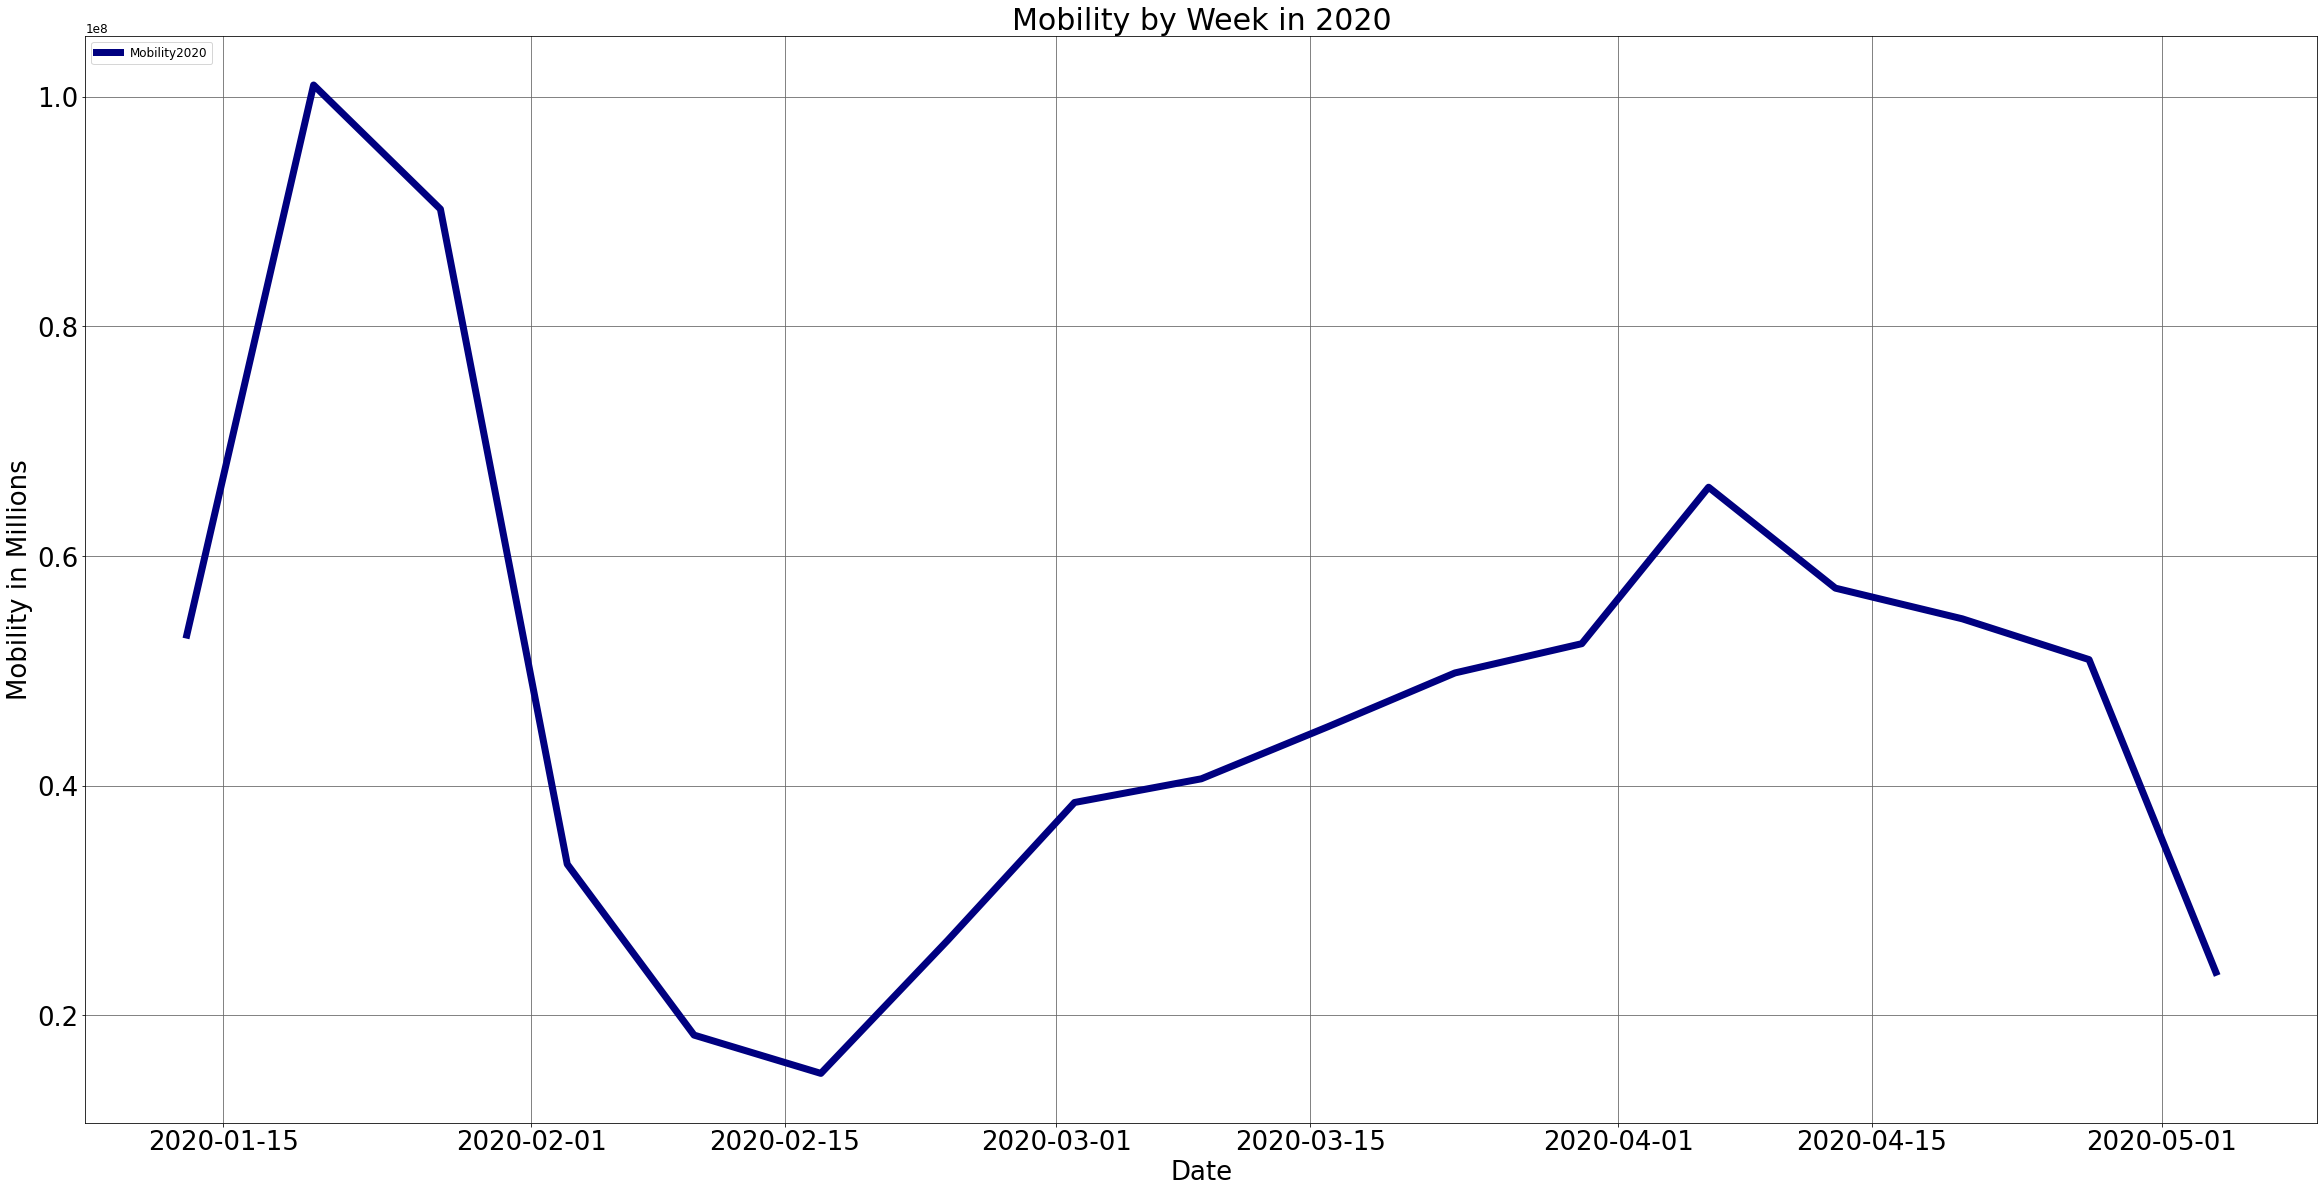

In [59]:
# Time series plots for mobility by weeks
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(40, 20))
df_date.reset_index()
# Specify how our lines should look
ax.plot(df_date.Date, df_date.Mobility, color='navy', label='Mobility2020',linewidth = 7)
# Same as above
ax.set_xlabel('Date', fontsize=26)
ax.set_ylabel('Mobility in Millions', fontsize=26)
ax.set_title('Mobility by Week in 2020', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
ax.grid(b=True, which='major', color='#666666', linestyle='-')
#myplt.savefig('./Media/Mobility_by_week_2020.png')
ax.legend(loc='upper left');

In [289]:
# Reducing the data shape to filter out the lowest values for the mobility
df_small = df_final[~(df_final['Val'] < 1000)]  
df_small.head()

,origin_city,origin_province,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,Date,Val
256,of Yantai,Shandong,370600,121.4256,37.4648,Baoding,Hebei,130600,115.4586,38.8846,2020-01-20,1070
408,of Yantai,Shandong,370600,121.4256,37.4648,Beijing,Beijing,110000,116.4004,39.9028,2020-01-13,5826
409,of Yantai,Shandong,370600,121.4256,37.4648,Beijing,Beijing,110000,116.4004,39.9028,2020-01-20,7848
410,of Yantai,Shandong,370600,121.4256,37.4648,Beijing,Beijing,110000,116.4004,39.9028,2020-01-27,6376
411,of Yantai,Shandong,370600,121.4256,37.4648,Beijing,Beijing,110000,116.4004,39.9028,2020-02-03,10177


In [290]:
df_small.shape

(93657, 12)

In [291]:
#df_small.to_csv('./Data/small_mapping.csv',index=False)

In [292]:
df_mapping.dtypes

origin_city                object
origin_province            object
city_id_o                  object
X_o                       float64
Y_o                       float64
dest_city                  object
dest_province              object
city_id_d                  object
X_d                       float64
Y_d                       float64
Date               datetime64[ns]
Val                         int32
dtype: object

In [293]:
df_map=df_mapping.groupby(['origin_city','X_o','Y_o']).agg({'Val':['sum']})
df_map.head()

In [297]:
df_map.columns = df_map.columns.map(''.join)
df_map.head()

,,,Valsum
origin_city,X_o,Y_o,
of Yantai,121.4256,37.4648,2338254
Aba Tibetan and Qiang Autonomous Prefecture,102.2204,31.9026,518549
Aksu region,80.2620,41.1688,561620
Ali area,80.0960,32.5030,14697
Altay region,88.1364,47.8536,253410


In [300]:
df_map_dest=df_mapping.groupby(['dest_city','X_d','Y_d']).agg({'Val':['sum']})
df_map_dest.head()

,,,Val
,,,sum
dest_city,X_d,Y_d,
of Yantai,121.4256,37.4648,2280770
Aba Tibetan and Qiang Autonomous Prefecture,102.2204,31.9026,568235
Aksu region,80.2620,41.1688,605286
Ali area,80.0960,32.5030,15585
Altay region,88.1364,47.8536,240602


In [302]:
df_map_dest.columns = df_map_dest.columns.map(''.join)
df_map_dest.head()

,,,Valsum
dest_city,X_d,Y_d,
of Yantai,121.4256,37.4648,2280770
Aba Tibetan and Qiang Autonomous Prefecture,102.2204,31.9026,568235
Aksu region,80.2620,41.1688,605286
Ali area,80.0960,32.5030,15585
Altay region,88.1364,47.8536,240602


In [305]:
#df_map_dest.to_csv('./Data/mapping_dest.csv',index=True)

In [306]:
#df_mapping.to_csv('./Data/mapping_visual.csv',index=False)

In [307]:
#df_map.to_csv('./Data/mapping_origin.csv',index=True)

In [309]:
# locations file
df3=df_final.drop(['origin_province','dest_city','dest_province','city_id_d','X_d','Y_d','Date','Val'],axis=1)
df3.head()

,origin_city,city_id_o,X_o,Y_o
0,of Yantai,370600,121.4256,37.4648
1,of Yantai,370600,121.4256,37.4648
2,of Yantai,370600,121.4256,37.4648
3,of Yantai,370600,121.4256,37.4648
4,of Yantai,370600,121.4256,37.4648


In [310]:
# Reordering the dataframe for better layout 
cols_to_order=['city_id_o','origin_city','Y_o','X_o']
new_columns = cols_to_order + (df3.columns.drop(cols_to_order).tolist())
df3=df3[new_columns]
df3.head()

,city_id_o,origin_city,Y_o,X_o
0,370600,of Yantai,37.4648,121.4256
1,370600,of Yantai,37.4648,121.4256
2,370600,of Yantai,37.4648,121.4256
3,370600,of Yantai,37.4648,121.4256
4,370600,of Yantai,37.4648,121.4256


In [311]:
#saving the csv for mapping
#df3.drop_duplicates(['city_id_o','origin_city']).to_csv('./Data/locations.csv',index=False)

In [312]:
# Creating file to utilise both city ids and value with date in the flowmap visualization
df4=df_mapping.drop(['origin_province','origin_city','X_o','Y_o','dest_province','dest_city','X_d','Y_d'],axis=1)
df4.head()

,city_id_o,city_id_d,Date,Val
85,370600,610900,2020-01-13,332
86,370600,610900,2020-01-20,520
87,370600,610900,2020-01-27,218
102,370600,340800,2020-01-13,213
103,370600,340800,2020-01-20,512


In [313]:
# Reordering the dataframe for better layout 
cols_to_order=['city_id_o','city_id_d','Val','Date']
new_columns = cols_to_order + (df4.columns.drop(cols_to_order).tolist())
df4=df4[new_columns]
df4.head()

,city_id_o,city_id_d,Val,Date
85,370600,610900,332,2020-01-13
86,370600,610900,520,2020-01-20
87,370600,610900,218,2020-01-27
102,370600,340800,213,2020-01-13
103,370600,340800,512,2020-01-20


In [314]:
# Flows file
df4['Date'] = pd.to_datetime(df4['Date']).dt.strftime('%Y-%m-%d')
df4.head()

,city_id_o,city_id_d,Val,Date
85,370600,610900,332,2020-01-13
86,370600,610900,520,2020-01-20
87,370600,610900,218,2020-01-27
102,370600,340800,213,2020-01-13
103,370600,340800,512,2020-01-20


In [315]:
old_names = df4.columns.tolist()
old_names

['city_id_o', 'city_id_d', 'Val', 'Date']

In [316]:
new_names=['origin','dest','count','time']

In [317]:
df4 = df4.rename(columns=dict(zip(old_names, new_names))) 
df4.head()

,origin,dest,count,time
85,370600,610900,332,2020-01-13
86,370600,610900,520,2020-01-20
87,370600,610900,218,2020-01-27
102,370600,340800,213,2020-01-13
103,370600,340800,512,2020-01-20


In [318]:
#saving the csv for mapping
#df4.to_csv('./Data/flows.csv',index=False)

In [319]:
#saving the csv for mapping
#df_final.to_csv('./Data/mapping_visual.csv',index=False)

### Total Mobility Count Analysis

In [320]:
# Aggregating by Origin City and Origin Province
orig_df=a.drop(a.iloc[:, 2:10], axis=1)
orig_df.head()

,origin_city,origin_province,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
0,Wanning,Hainan,0,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Sanya,Hainan,11,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Sanming,Fujian,0,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Sansha,Hainan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,Henan,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [321]:
orig_df.shape

(133590, 19)

In [322]:
# just origin city
origin_city_df=orig_df.drop(columns=['origin_province'])
origin_city_df.head()

,origin_city,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
0,Wanning,0,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Sanya,11,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Sanming,0,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Sansha,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [323]:
bar_orig=origin_city_df.groupby('origin_city').sum().sum()

In [324]:
# Origin by weeks
by_day=df2.drop(df2.iloc[:, 2:10], axis=1)
by_day.head()

,origin_city,origin_province,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,Wanning,Hainan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,Sanya,Hainan,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,Sanming,Fujian,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,Sansha,Hainan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,Henan,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [325]:
# just origin city
origin_city_day=by_day.drop(columns=['origin_province'])
origin_city_day.head()

,origin_city,20200110,20200111,20200112,20200113,20200114,20200115,20200116,20200117,20200118,20200119,20200120,20200121,20200122,20200123,20200124,20200125,20200126,20200127,20200128,20200129,20200130,20200131,20200201,20200202,20200203,20200204,20200205,20200206,20200207,20200208,20200209,20200210,20200211,20200212,20200213,20200214,20200215,20200216,20200217,20200218,20200219,20200220,20200221,20200222,20200223,20200224,20200225,20200226,20200227,20200228,20200229,20200301,20200302,20200303,20200304,20200305,20200306,20200307,20200308,20200309,20200310,20200311,20200312,20200313,20200314,20200315,20200316,20200317,20200318,20200319,20200320,20200321,20200322,20200323,20200324,20200325,20200326,20200327,20200328,20200329,20200330,20200331,20200401,20200402,20200403,20200404,20200405,20200406,20200407,20200408,20200409,20200410,20200411,20200412,20200413,20200414,20200415,20200416,20200417,20200418,20200419,20200420,20200421,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430
0,Wanning,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,7,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0
1,Sanya,3,3,5,6,3,4,3,7,4,4,4,4,6,3,6,6,3,4,2,3,12,4,4,2,2,8,2,8,3,3,5,0,1,2,4,2,2,5,1,5,0,2,0,8,1,4,5,0,0,4,3,3,0,13,3,2,3,2,4,5,9,6,5,6,0,0,1,1,2,1,4,4,2,6,1,8,3,3,3,3,3,5,6,2,3,3,6,2,4,2,1,5,15,11,1,7,7,2,6,2,6,6,4,3,1,4,2,9,2,0,1,0
2,Sanming,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,Sansha,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [326]:
bar_orig_day=origin_city_day.groupby('origin_city').sum().sum()

In [329]:
# Bar plot by Day
ax=bar_orig_day.plot(kind='barh',color='slategrey')
plt.gcf().set_size_inches(100, 200)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
for i, v in enumerate(bar_orig_day):
    ax.text(v + 3, i + .25, str(v), color='red', fontweight='bold')
plt.title('Total Mobility Count by Day', fontsize=20)
plt.xlabel('Count in Millions', fontsize=15)
plt.ylabel('Week', fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.savefig('./Media/total_origin_mobility_By_Day_2020.png') 
plt.show()

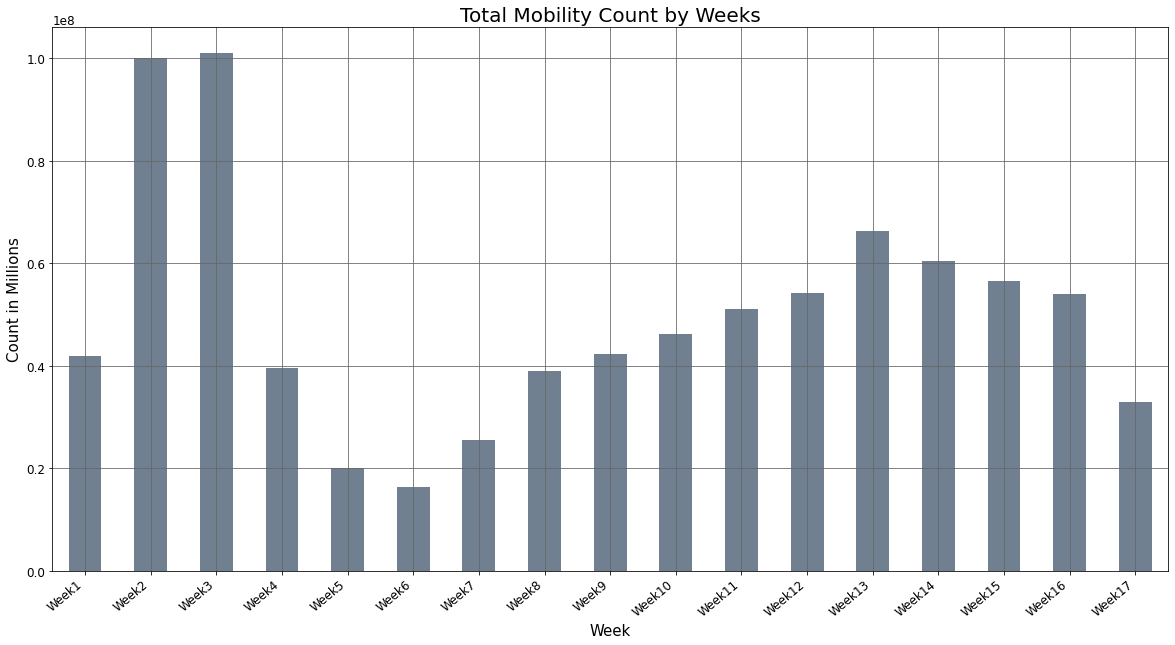

In [331]:
# BAr plot by weeks
ax=bar_orig.plot(kind='bar',color='slategrey')
plt.gcf().set_size_inches(20, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
plt.title('Total Mobility Count by Weeks', fontsize=20)
plt.xlabel('Week', fontsize=15)
plt.ylabel('Count in Millions', fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.savefig('./Media/total_origin_mobility2020.png') 
plt.show()


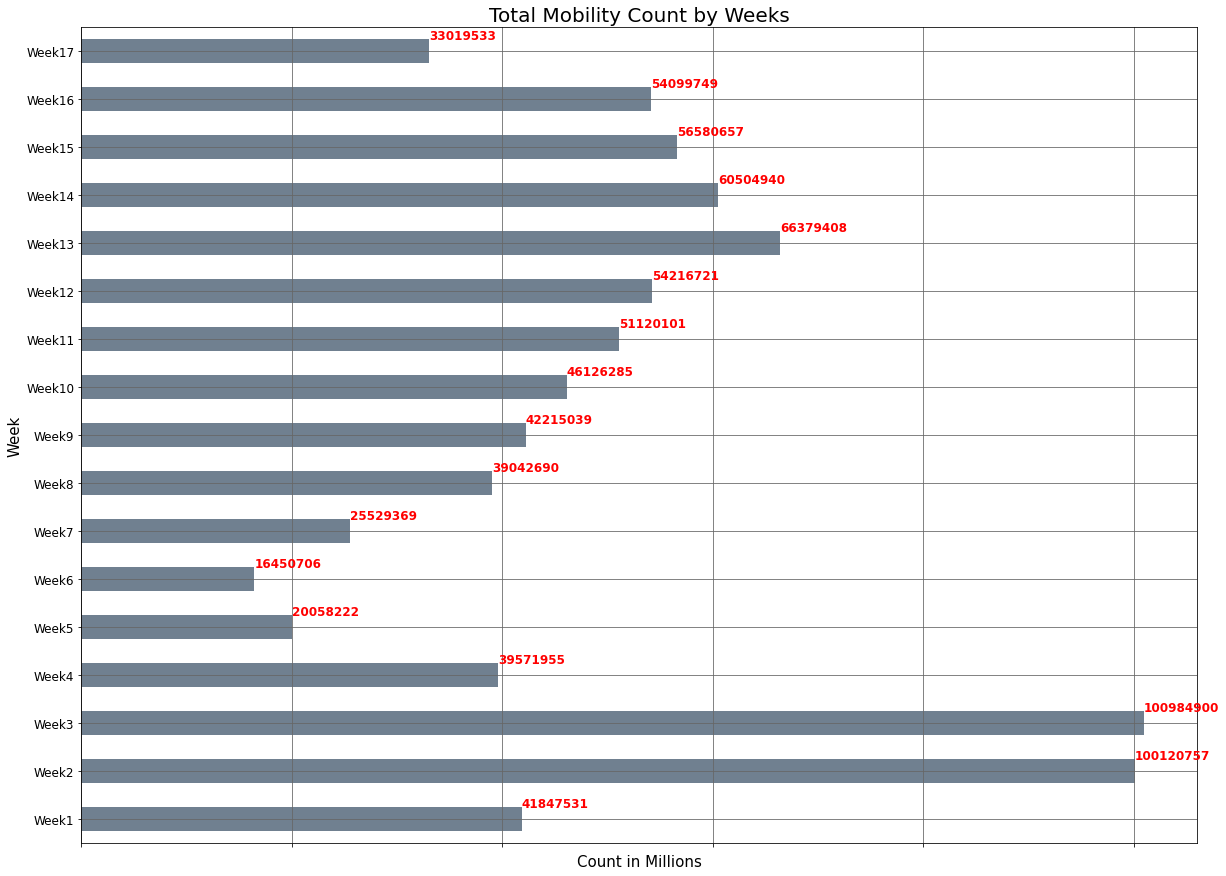

In [332]:
# Bar plot horizontal
ax=bar_orig.plot(kind='barh',color='slategrey')
plt.gcf().set_size_inches(20, 15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
for i, v in enumerate(bar_orig):
    ax.text(v + 3, i + .25, str(v), color='red', fontweight='bold')
plt.title('Total Mobility Count by Weeks', fontsize=20)
plt.xlabel('Count in Millions', fontsize=15)
plt.ylabel('Week', fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.savefig('./Media/total_origin_mobility2020_2.png') 
plt.show()

### Origin City Analysis

In [334]:
# grouping origin city by total sum daily
origin_city_aggreagted_by_day=origin_city_df.groupby(['origin_city']).sum()
origin_city_aggreagted_by_day.head()

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
origin_city,,,,,,,,,,,,,,,,,
of Yantai,164544,293605,312425,138954,59671,48654,60069,75750,89058,112264,137459,152315,194506,183007,168688,168351,107125
Aba Tibetan and Qiang Autonomous Prefecture,36203,79901,63525,26112,11896,6322,8487,16505,15433,16948,21330,29469,43933,45064,46055,44384,34454
Aksu region,37300,88930,63278,17325,5873,4958,5529,7797,12366,30401,44945,50477,51659,49160,55331,55068,32554
Ali area,1166,2043,1724,531,344,392,459,491,549,574,815,1248,1929,1599,2024,2284,1467
Altay region,14176,30688,26848,10056,2634,2310,2045,2963,4992,17858,20892,21063,23778,23663,25513,26120,15743


In [335]:
# grouping to check the total sum of the values of movement for each origin province
o_prov=orig_df.groupby(['origin_province']).sum()
o_prov.head()

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
origin_province,,,,,,,,,,,,,,,,,
Anhui,1456637,3333612,4006289,2494359,1192636,860228,1617712,2506260,2522820,2530804,2696338,2651896,3203949,3038523,2637823,2526186,1473057
Beijing,1214735,2961398,3800371,417079,216294,191186,210540,259995,281412,312878,362939,420203,496803,443559,476841,573435,420021
Chongqing,396255,1101762,1516834,669751,280873,188865,316507,593953,618291,585344,564926,549541,659827,564088,532516,503007,323363
Fujian,1185945,3117546,2871000,997542,580153,487016,814812,1058500,1069260,1161268,1262223,1274638,1676870,1554442,1396903,1319806,808607
Gansu province,546512,1220813,1158680,573122,289126,244681,398135,680339,721785,797198,893359,913319,986860,945567,932731,881585,520540


In [336]:
o_prov.describe()

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
count,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01
mean,1.349920e+06,3.229702e+06,3.257577e+06,1.276515e+06,6.470394e+05,5.306679e+05,8.235280e+05,1.259442e+06,1.361775e+06,1.487945e+06,1.649036e+06,1.748926e+06,2.141271e+06,1.951772e+06,1.825182e+06,1.745153e+06,1.065146e+06
std,1.173358e+06,3.361808e+06,2.852889e+06,1.006700e+06,6.063151e+05,4.788150e+05,7.264486e+05,1.111535e+06,1.192035e+06,1.274615e+06,1.340520e+06,1.423671e+06,1.878561e+06,1.577515e+06,1.488779e+06,1.445781e+06,8.969133e+05
min,8.241400e+04,1.780210e+05,1.617930e+05,9.295400e+04,2.571800e+04,2.939100e+04,3.761000e+04,4.352900e+04,4.958200e+04,5.258100e+04,6.220800e+04,8.593800e+04,1.140190e+05,1.153720e+05,1.290630e+05,1.260870e+05,7.786000e+04
25%,6.169735e+05,1.291272e+06,1.448044e+06,5.041180e+05,2.849995e+05,1.991715e+05,2.598155e+05,3.295580e+05,3.815935e+05,5.533855e+05,6.843920e+05,7.883375e+05,9.476085e+05,8.232775e+05,7.917105e+05,6.992655e+05,4.187425e+05
50%,1.071821e+06,2.678343e+06,2.871000e+06,1.012141e+06,4.947250e+05,3.679110e+05,6.666720e+05,1.038394e+06,1.069260e+06,1.161268e+06,1.286959e+06,1.352149e+06,1.676870e+06,1.644844e+06,1.439740e+06,1.319806e+06,8.106410e+05
75%,1.514594e+06,3.406481e+06,3.903330e+06,1.683351e+06,8.567465e+05,7.339660e+05,1.284756e+06,1.881223e+06,1.929639e+06,2.061947e+06,2.238312e+06,2.302959e+06,2.928749e+06,2.842137e+06,2.529706e+06,2.381794e+06,1.407250e+06
max,6.169318e+06,1.823364e+07,1.477784e+07,4.025942e+06,2.569001e+06,2.259970e+06,3.211023e+06,4.773186e+06,5.243422e+06,5.918345e+06,6.338526e+06,6.878424e+06,9.573316e+06,7.601884e+06,7.220633e+06,6.910935e+06,4.389368e+06


In [337]:
o_prov['origin_province']=o_prov.index

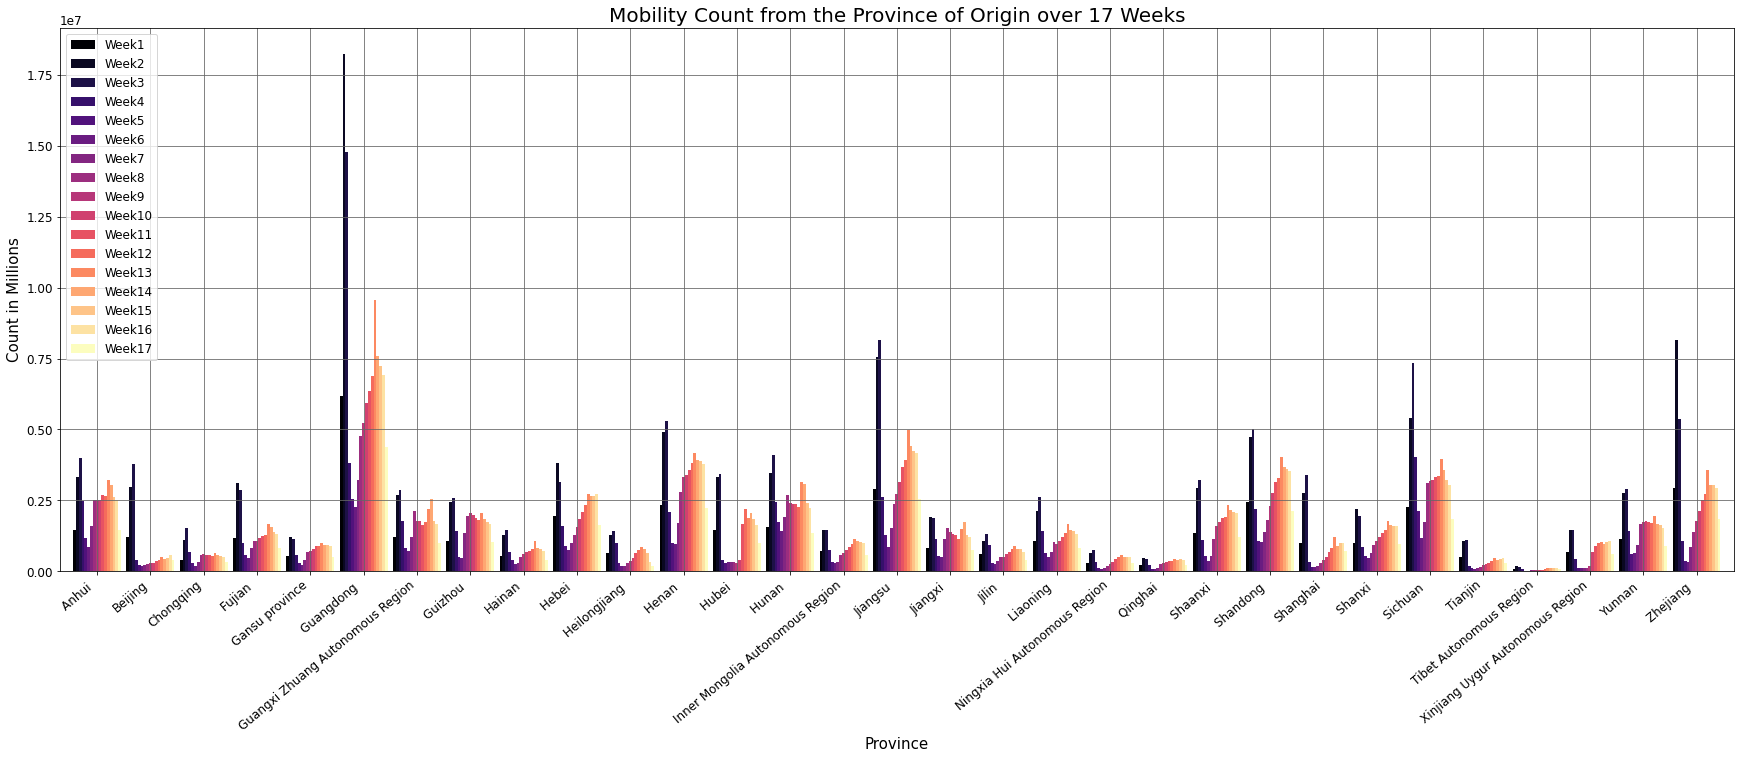

In [338]:
# Plotting a bar plot to understand the main hotspots in the origin cities for travelling
ax=o_prov.plot(kind='bar',width=0.9,cmap='magma')
plt.gcf().set_size_inches(30, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
plt.title('Mobility Count from the Province of Origin over 17 Weeks', fontsize=20)
plt.xlabel('Province', fontsize=15)
plt.ylabel('Count in Millions', fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.savefig('./Media/origin_mobility2020.png') 
plt.show()


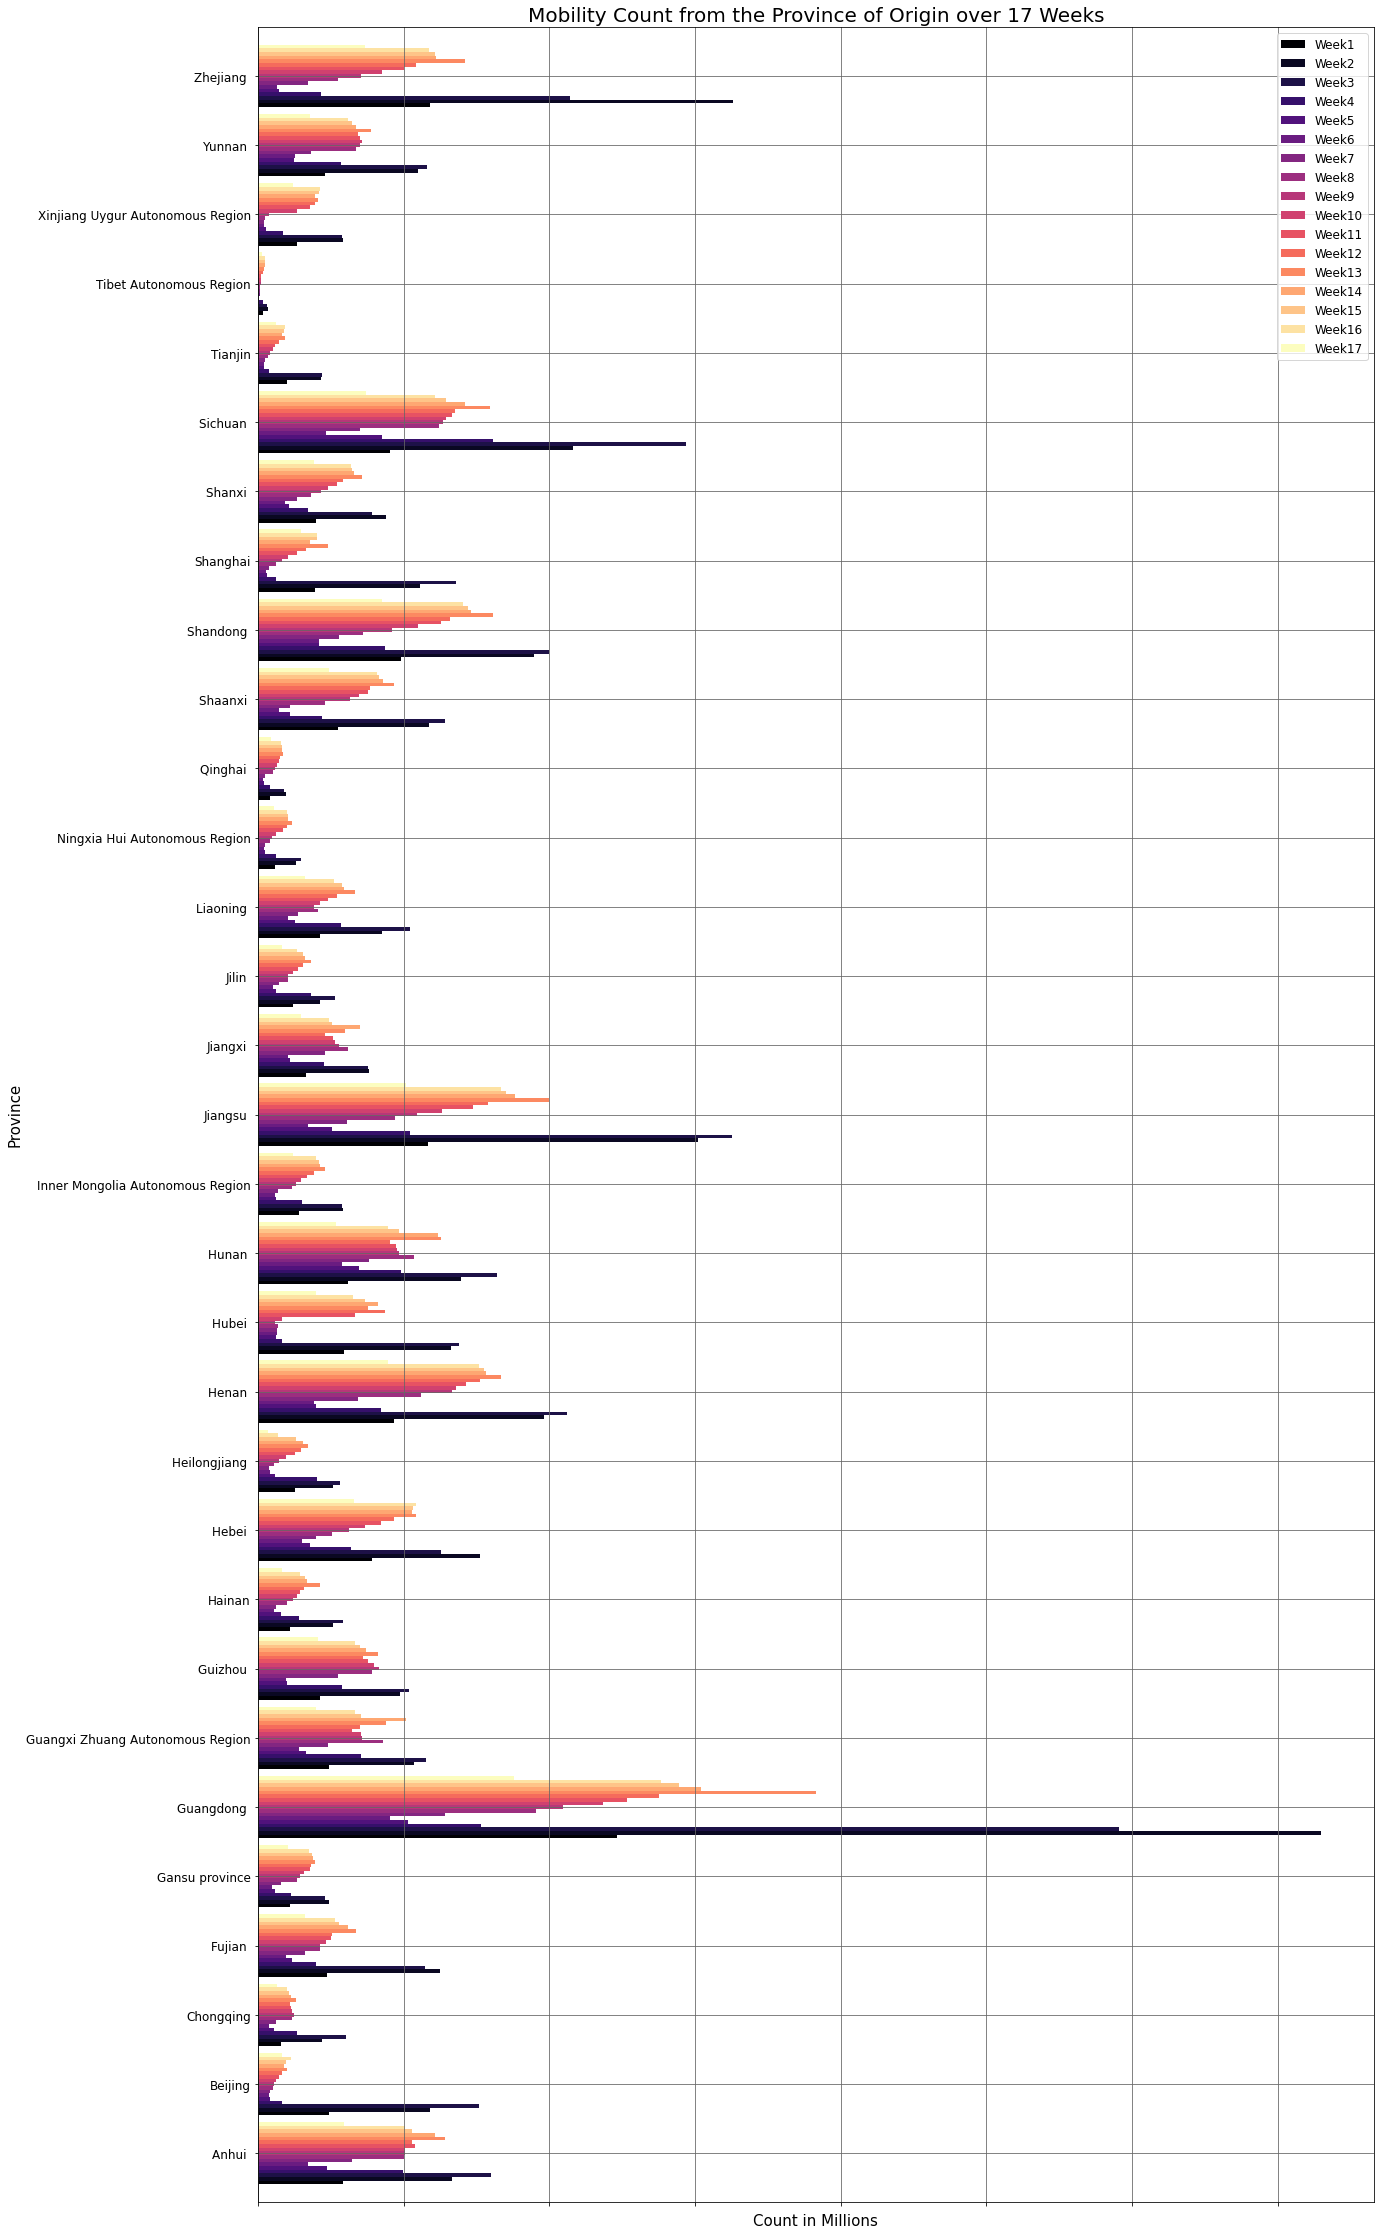

In [339]:
# Plotting a bar plot to understand the main hotspots in the origin cities for travelling
ax=o_prov.plot(kind='barh',width=0.9,cmap='magma')
plt.gcf().set_size_inches(20, 40)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
plt.title('Mobility Count from the Province of Origin over 17 Weeks', fontsize=20)
plt.xlabel('Count in Millions', fontsize=15)
plt.ylabel('Province', fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.savefig('./Media/origin_mobility2020_2.png') 
plt.show()

In [341]:
a.groupby(['origin_province']).max()

,origin_city,city_id_o,X_o,Y_o,dest_city,dest_province,city_id_d,X_d,Y_d,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
origin_province,,,,,,,,,,,,,,,,,,,,,,,,,,
Anhui,Xuancheng,341800,118.751200,33.957800,Zunyi,Zhejiang,659009,131.1514,52.451053,46445,113075,188091,68208,34470,25241,36143,54198,58289,64028,72641,77170,114256,89512,75260,68670,41588
Beijing,Beijing,110000,116.400400,39.902800,Zunyi,Zhejiang,659009,131.1514,52.451053,202510,320624,280231,59109,54385,53520,63472,80009,94461,106881,125485,144244,166631,155362,177649,199196,118031
Chongqing,Chongqing,500000,106.545000,29.565800,Zunyi,Zhejiang,659009,131.1514,52.451053,45455,105901,182117,86786,27456,11984,18071,31416,34363,40173,46505,54530,71564,73262,65432,63322,38600
Fujian,Zhangzhou,350900,119.543000,27.368800,Zunyi,Zhejiang,659009,131.1514,52.451053,74116,130670,200640,64424,47152,45322,57892,74061,81103,91344,98265,100294,143797,118227,106219,94286,54663
Gansu province,Zhangye,623000,107.633600,39.774000,Zunyi,Zhejiang,659009,131.1514,52.451053,26316,56008,77258,25543,11375,11168,18562,30799,32808,35384,39321,39511,42317,41266,37670,34868,20396
Guangdong,Zhuhai city,445300,116.676800,24.813800,Zunyi,Zhejiang,659009,131.1514,52.451053,238145,438085,212975,72036,74333,99046,134575,200937,257190,310956,340345,365848,410584,366147,406575,388885,211469
Guangxi Zhuang Autonomous Region,Yulin,451400,111.559559,25.241800,Zunyi,Zhejiang,659009,131.1514,52.451053,40035,79028,125743,60853,17814,18292,31864,50836,38781,47411,43947,79651,85755,81992,53014,49498,28541
Guizhou,Zunyi,522700,109.207935,27.729600,Zunyi,Zhejiang,659009,131.1514,52.451053,75103,150062,212229,113007,24454,21912,85381,108263,108851,109498,106127,102526,139500,119694,94931,88786,55733
Hainan,Wuzhishan,469030,112.334000,20.046268,Zunyi,Zhejiang,659009,131.1514,52.451053,23607,51466,75191,29708,16486,13107,14195,23572,29585,34039,36226,38886,57607,44333,41021,37115,21895


In [342]:
# aggregating by weeks for origin city
df_orig=a.groupby(['origin_city']).sum()
df_orig.head()

,X_o,Y_o,X_d,Y_d,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
origin_city,,,,,,,,,,,,,,,,,,,,,
of Yantai,44320.344,13674.652,40460.610906,11922.239716,164544,293605,312425,138954,59671,48654,60069,75750,89058,112264,137459,152315,194506,183007,168688,168351,107125
Aba Tibetan and Qiang Autonomous Prefecture,37310.446,11644.449,40479.816106,11927.801916,36203,79901,63525,26112,11896,6322,8487,16505,15433,16948,21330,29469,43933,45064,46055,44384,34454
Aksu region,29295.630,15026.612,40501.774506,11918.535716,37300,88930,63278,17325,5873,4958,5529,7797,12366,30401,44945,50477,51659,49160,55331,55068,32554
Ali area,29235.040,11863.595,40501.940506,11927.201516,1166,2043,1724,531,344,392,459,491,549,574,815,1248,1929,1599,2024,2284,1467
Altay region,32169.786,17466.564,40493.900106,11911.850916,14176,30688,26848,10056,2634,2310,2045,2963,4992,17858,20892,21063,23778,23663,25513,26120,15743


### Destination City Analysis

In [343]:
dep=a.drop(df2.iloc[:, 0:5], axis=1)
dep.head()

,dest_city,dest_province,city_id_d,X_d,Y_d,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
0,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Qitaihe,Heilongjiang,230900,130.9292,45.7842,11,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Qitaihe,Heilongjiang,230900,130.9292,45.7842,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [344]:
dep_df=dep.drop(dep.iloc[:, 3:5], axis=1)
dep_df.head()

,dest_city,dest_province,city_id_d,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
0,Qitaihe,Heilongjiang,230900,0,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Qitaihe,Heilongjiang,230900,11,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Qitaihe,Heilongjiang,230900,0,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Qitaihe,Heilongjiang,230900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Qitaihe,Heilongjiang,230900,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [346]:
dep_df.drop('city_id_d',axis=1,inplace=True)
dep_df.head()

,dest_city,dest_province,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
0,Qitaihe,Heilongjiang,0,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Qitaihe,Heilongjiang,11,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Qitaihe,Heilongjiang,0,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Qitaihe,Heilongjiang,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Qitaihe,Heilongjiang,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [348]:
dep_bar=dep_df.groupby('dest_city').sum().sum()
dep_bar

Week1      41847531
Week2     100120757
Week3     100984900
Week4      39571955
Week5      20058222
Week6      16450706
Week7      25529369
Week8      39042690
Week9      42215039
Week10     46126285
Week11     51120101
Week12     54216721
Week13     66379408
Week14     60504940
Week15     56580657
Week16     54099749
Week17     33019533
dtype: int64

In [349]:
# aggregating destination city and province data weekly
#d= dep_df.set_index(['dest_city','dest_province','city_id_d']).rename(columns=lambda x: pd.to_datetime(x))
#d = d.resample('W', axis=1).sum().reset_index()
#d.head(20)

In [350]:
d_prov=dep_df.groupby(['dest_province']).sum()
d_prov.head()

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
dest_province,,,,,,,,,,,,,,,,,
Anhui,1926668,5889344,6831671,1667359,757345,594726,855113,1505491,1721953,1989388,2360565,2527882,3316614,2753933,2610955,2535826,1627403
Beijing,954877,1882203,1113236,1282703,738350,508668,468329,480359,447196,486785,542607,584425,658558,668389,624138,681196,421980
Chongqing,609660,1711637,1598406,624816,271453,161189,242827,417476,420613,445815,489830,510590,582764,558229,525649,514571,330814
Fujian,1027907,2472427,2649885,1055940,575642,493340,894617,1229077,1242700,1297731,1334701,1320550,1715387,1550385,1397751,1308179,797244
Gansu province,627545,1485202,1566450,548003,252538,232174,370534,640447,682581,781605,873426,885979,975362,925280,922966,882426,526277


In [351]:
d_prov['dest_province']=d_prov.index

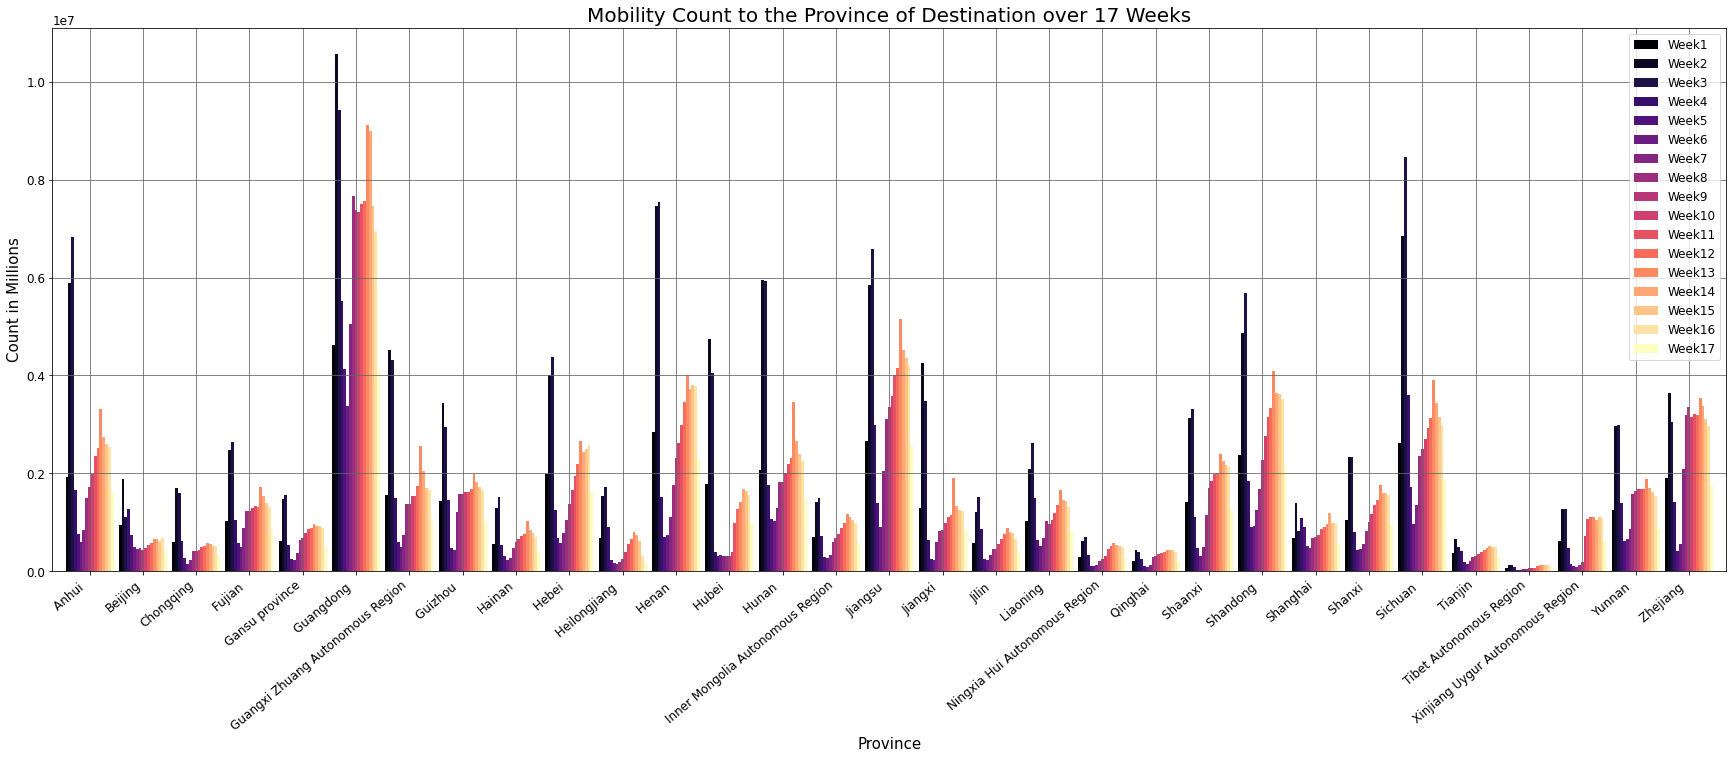

In [352]:
# Plotting a bar plot to understand the main hotspots in the destination cities for travelling
ax=d_prov.plot(kind='bar',width=0.9,cmap='magma')
plt.gcf().set_size_inches(30, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
plt.title('Mobility Count to the Province of Destination over 17 Weeks', fontsize=20)
plt.xlabel('Province', fontsize=15)
plt.ylabel('Count in Millions', fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.savefig('./Media/destination_mobility2020.png')
plt.show()


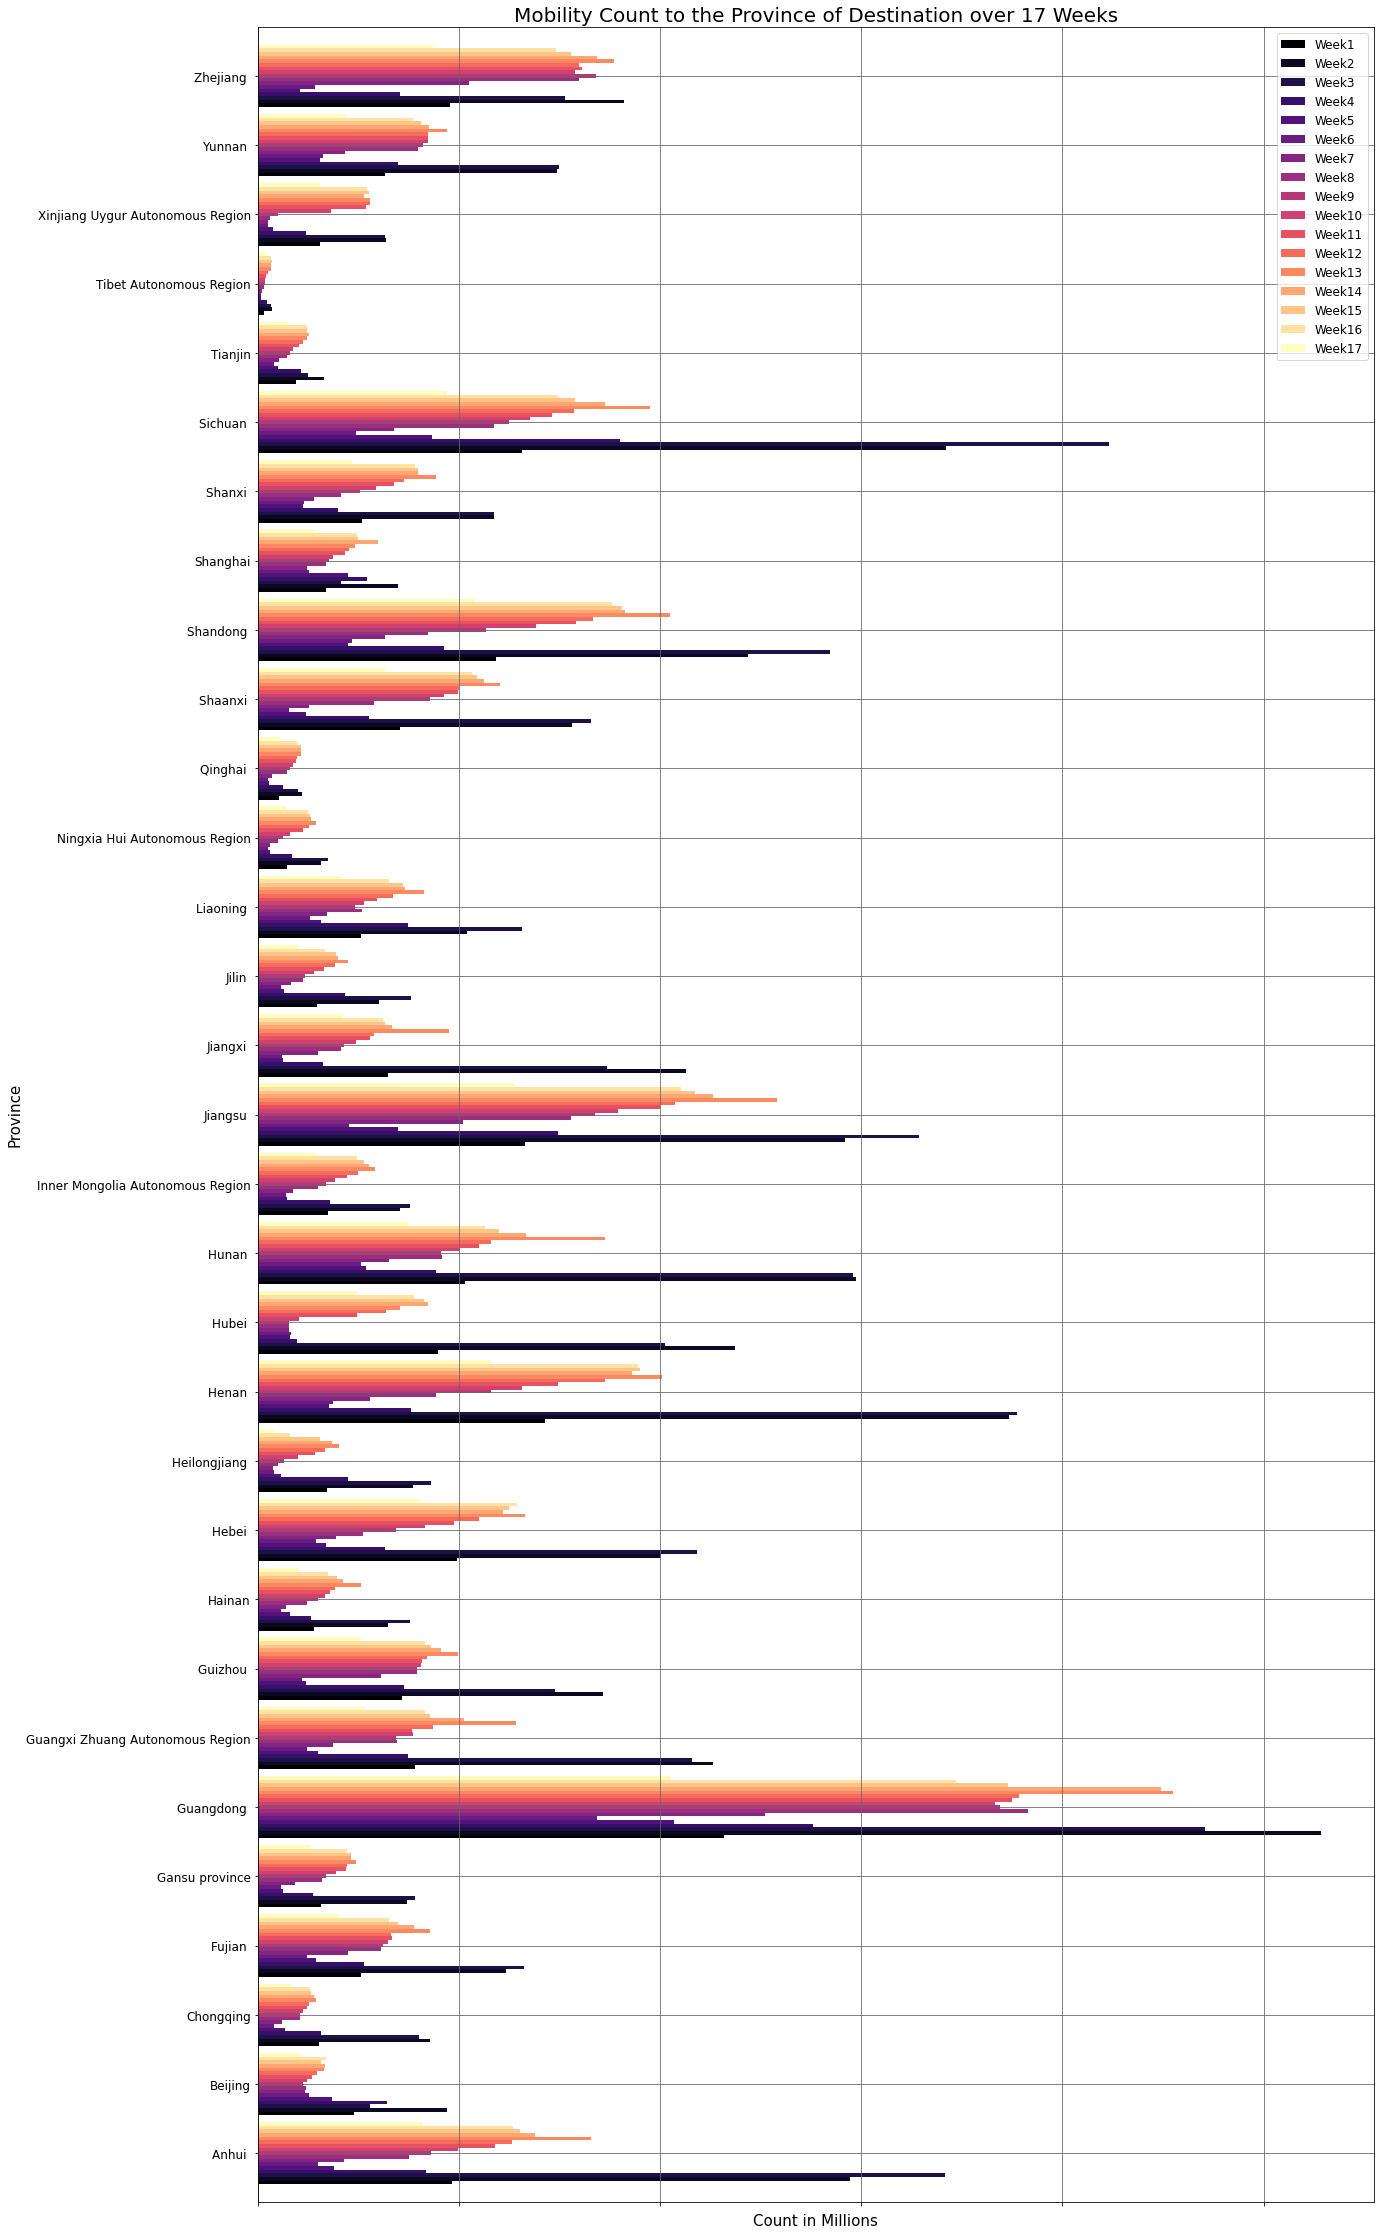

In [360]:
# Plotting a bar plot to understand the main hotspots in the destination cities for travelling
ax=d_prov.plot(kind='barh',width=0.9,cmap='magma')
plt.gcf().set_size_inches(20, 40)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_legend()
plt.title('Mobility Count to the Province of Destination over 17 Weeks', fontsize=20)
plt.xlabel('Count in Millions', fontsize=15)
plt.ylabel('Province', fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.savefig('./Media/destination_mobility2020_2.png')
plt.show()


### Saving data for Self Organizing Maps

In [357]:
mod=a.drop(['X_o','Y_o','X_d','Y_d'],axis=1)
mod.head()

,origin_city,origin_province,city_id_o,dest_city,dest_province,city_id_d,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14,Week15,Week16,Week17
0,Wanning,Hainan,469006,Qitaihe,Heilongjiang,230900,0,0,0,2,3,1,2,0,12,2,0,0,0,1,2,0,2
1,Sanya,Hainan,460200,Qitaihe,Heilongjiang,230900,11,31,32,31,31,16,17,19,27,31,15,27,28,40,31,29,3
2,Sanming,Fujian,350400,Qitaihe,Heilongjiang,230900,0,4,0,0,1,0,0,0,0,0,0,0,0,3,0,2,0
3,Sansha,Hainan,460300,Qitaihe,Heilongjiang,230900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanmenxia,Henan,411200,Qitaihe,Heilongjiang,230900,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [355]:
#saving the file
#mod.to_csv('./Data/som2020.csv', index=False)

In [359]:
a['origin_province'].nunique()

31